<a href="https://colab.research.google.com/github/jerry-simon/Data_Science_And_Machine_Learning/blob/main/Walmart_Business_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1><font color = 'orange'>Defining the Business Problem</font></H1>

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States.

The Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand,

>if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

(Assumption 50 million customers are male and 50 million are female).

<H1><font color = 'orange'>A summary of the Walmart Dataset</font></H1>

In [ ]:
#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
from scipy.stats import norm

In [ ]:
#Reading the CSV file
df = pd.read_csv('walmart_data.csv')

In [ ]:
#Exploring few random rows in the given dataset.
df.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
500486,1005074,P00140042,M,0-17,0,B,2,0,1,15464
350078,1005916,P00266142,M,51-55,20,B,1,1,5,6954
123653,1001117,P00147942,M,18-25,14,B,3,0,1,19409
14159,1002102,P00118442,M,26-35,11,B,3,0,1,7900
263523,1004534,P00062742,M,18-25,4,C,1,0,8,8088
362795,1001836,P00111142,M,26-35,0,A,4+,0,1,19561
257987,1003762,P00196942,M,51-55,6,B,0,1,5,1735
426658,1005686,P00202342,M,55+,16,A,1,1,16,4833
245365,1001775,P00344242,M,26-35,4,C,3,1,8,8063
481116,1002041,P00205242,F,26-35,20,B,4+,0,5,3493


In [ ]:
#Exploring the shape of walmart dataset
df.shape

(550068, 10)

In the given walmart dataset there are 550068 records along with 10 columns.


In [ ]:
#To check the number of null values present in the given walmart dataset
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

The dataset does not suffer from any null values.

In [ ]:
# To get a comprehensive overview of walmart dataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


The following Python function reveals some of the key information related to the Walmart dataset. First and foremost, the index range. There are 550068 records ranging from 0 to 550067. The next important insight that we can draw from this function is that it contains the names of all columns followed by its datatypes. The User ID, Occupation, Marital_Status, Product_Category, Purchase are of the integer datatype or int64 and rest all the columns are of object datatype. In short, there are 5 columns with object datatype and 5 column with integer datatype.

Furthermore, the function also delves into the number of non-null entries in the dataset. As mentioned earlier, the dataset does not suffer from any data loss. Finally, the data frame occupies circa 42.0 kilo bytes of memory.

<H1><font color = 'orange'>Summary Statistics</font></H1>


In [ ]:
#To get the summary of the integer values of the walmart dataset
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


We can draw many interesting insights based on the above table. However, I have only included the highlights of them.

<B>User ID</B>-> It is a unique ID that doesn't add much relevant summary stats to our analysis, and the primary objective is to identify each records uniquely.

<B>Occupation</B> -> It is a masked categorical column of integer datatype with 21 different occupations that ranges from 0 (minimum value) to 20 (maximum value).

<B>Marital Status</B> -> It is a categorical column of integer datatype with only 2 values in it 0 (minimum value means the person is single) and 1 (maximum value means the person is married)

<B>Product_Category</B> -> It is a masked categorical column of integer datatype with 20 different product categories that ranges from 1 (minimum value) to 20 (maximum value).

<B>Purchase</B> -> This numerical column shows the purchase amount with average value of 9263.9 and a standard deviation of 5023.06. This large standard deviation could be a sign that the column may have outliers in it, however, further analysis is required to prove it. In addition, the minimum purchase amount is 12 and and the maximum purchase amount is 23,961.

In [ ]:
# Frequency or the mode of integer values present in the walmart dataset is shown below
# This is calculated because mode value is absent while using the describe funtion.
print("frequent User_ID is            : ", df['User_ID'].mode()[0])
print("frequent Occupation is         : ", df['Occupation'].mode()[0])
print("frequent Marital_Status is     : ", df['Marital_Status'].mode()[0])
print("frequent Product_Category is   : ", df['Product_Category'].mode()[0])
print("frequent Purchase amount is    : ", df['Purchase'].mode()[0])

frequent User_ID is            :  1001680
frequent Occupation is         :  4
frequent Marital_Status is     :  0
frequent Product_Category is   :  5
frequent Purchase amount is    :  7011


In [ ]:
#Summary statistics of categorical column
df.describe(include=['object'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


There are 5 categorical columns in the walmart dataset, and we can draw the following insights from it. First and foremost, there are 2 unique values present in the Gender column while there is only 7 unique values present in Age column (Most frequent shoppers of walmart belongs to the age category 26 - 35. These groups have purchased from walmart 21,9587 times according to the given dataset) and 3 unique values in City_Category columns. The most frequently brought Product_ID is P00265242 which was purchased 1880 times.

Furthermore, it is also clear that males are the frequent shoppers of walmart. Out of 550067 more than 400000 customers (414259 to be precise according to the data) are males. The Top most city_category is "B" with a frequency of 23,1173. Finally, the most frequent stay in current city years is 1 with the frequency is 19,3821.

<H1><font color = 'orange'>Value Counts of Categorical Variables</font></H1>

In [ ]:
#Total number of genders in the walmart dataset
df['Gender'].value_counts().reset_index()

,Gender,count
0,M,414259
1,F,135809


It is clear from the above picture that the males are frequent shoppers at Walmart followed by females.

In [ ]:
#Total number of age categories in the walmart dataset
df['Age'].value_counts().reset_index()

,Age,count
0,26-35,219587
1,36-45,110013
2,18-25,99660
3,46-50,45701
4,51-55,38501
5,55+,21504
6,0-17,15102


The most frequent customers of walmart belongs to the age category of 26 - 35 and the least frequent customers belongs to the age category of 0 - 17.

In [ ]:
#Total number of city categories in the walmart dataset
df['City_Category'].value_counts().reset_index()

,City_Category,count
0,B,231173
1,C,171175
2,A,147720


From the above table it is clear that the walmart customers from "B" city category is high, followed by "C" and then "A".

In [ ]:
#Total number of years stay in current city in the walmart dataset
df['Stay_In_Current_City_Years'].value_counts().reset_index()

,Stay_In_Current_City_Years,count
0,1,193821
1,2,101838
2,3,95285
3,4+,84726
4,0,74398


It is evident that most of the walmart customers stay in their current city for about 1 year and minimum years of stay in current city is 0. This 0 most probably indicates that the customer may stay for several months in their current city.

In [ ]:
#Total number of customers with their marital status in the walmart dataset
df['Marital_Status'].value_counts().reset_index()

,Marital_Status,count
0,0,324731
1,1,225337


Most of the walmart customers are single with a frequency of 324731 followed by couples with 225337.

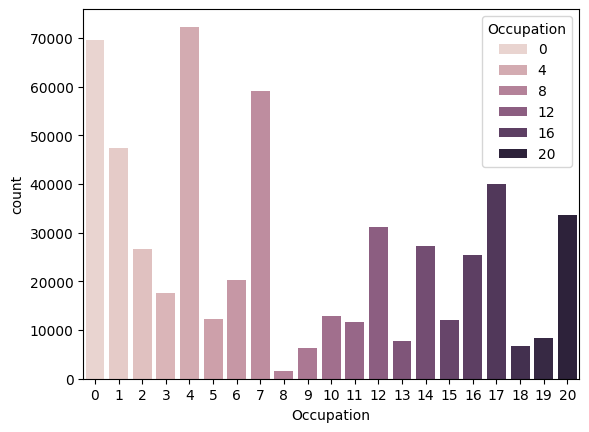

In [ ]:
#Occupation categories and their frequencies in the wallmart dataset
Occupation = df['Occupation'].value_counts().reset_index()
sns.barplot(x = 'Occupation', y = 'count', hue='Occupation', data = Occupation)
plt.show()

It seems like the majority of the custommers belongs to the occupation category of 4 followed by 0 and then 7. The occupation category 8 is least opted by wallmart customers. Since it is a masked list we cannot say what are these occupation categories.

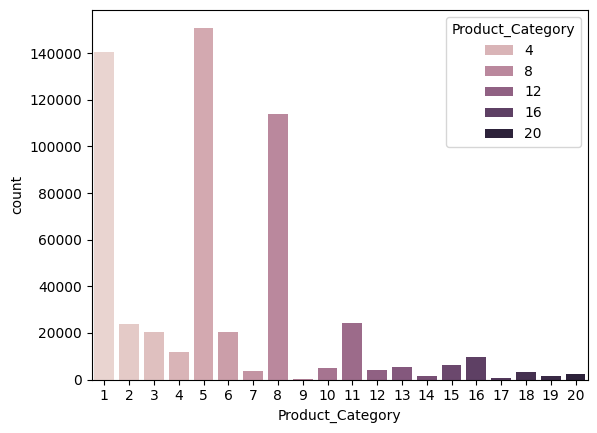

In [ ]:
#Product categories and their frequencies in the wallmart dataset
Product_Category = df['Product_Category'].value_counts().reset_index()
sns.barplot(x = 'Product_Category', y = 'count', hue='Product_Category', data = Product_Category)
plt.show()

It seems like the majority of the prdocts belongs to the product category of 5 followed by 1 and then 8. Product category 9 has the lowest stock in wallmart dataset. Since it is a masked list we cannot say what are these occupation categories.

<H1><font color = 'orange'>Outlier Detection - Using Boxplot (Univariate Analysis)</font></H1>

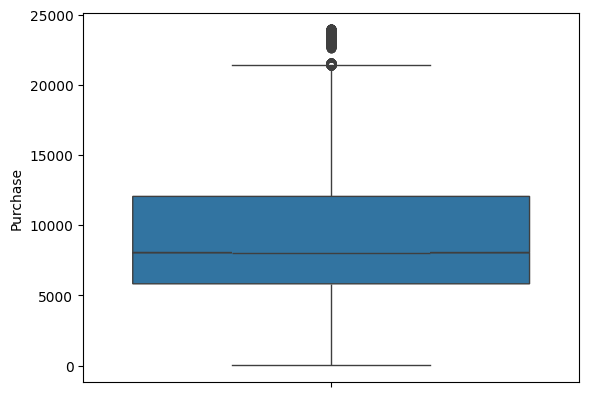

In [ ]:
#Plotting boxplots for the continous variable Purchase, rest all the variables are either unique_ids or categorical variables
sns.boxplot(df["Purchase"], notch=True)
plt.show()

It seems like there are outliers present in the purchase column, however its presence is low. We have to go for further analysis in order to confirm the same.

<H1><font color = 'orange'>Outlier Detection - Using IQR</font></H1>

In [ ]:
#A funtion to detect the number of outliers above and below the thresholds
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    # Define lower and upper thresholds for outliers
    lower_threshold = q1 - 1.5 * IQR
    upper_threshold = q3 + 1.5 * IQR
    # Identify outliers
    lower_outliers = df[(df < lower_threshold)]
    upper_outliers = df[(df > upper_threshold)]
    # Return the number of outliers above and below the thresholds
    return lower_outliers.size, upper_outliers.size

In [ ]:
#Total number of outliers present above and below. Finally, the overall presence of outliers in the walmart dataset
x, y = find_outliers_IQR(df['Purchase'])
print("Purchase amount Lower outliers : ", x)
print("Purchase amount Upper outliers : ", y)
percentage_of_outliers = round((x+y)*100/df.shape[0],2)
print("Percentage of outliers : ", percentage_of_outliers)

Purchase amount Lower outliers :  0
Purchase amount Upper outliers :  2677
Percentage of outliers :  0.49


It seems like there's only 0.49% of outliers present in the purchase column of walmart dataset. Thus, we can now confirm that outlier presence is low in the given dataset.

<H1><font color = 'orange'>Bi-Variate & Multi-variate Analysis</font></H1>

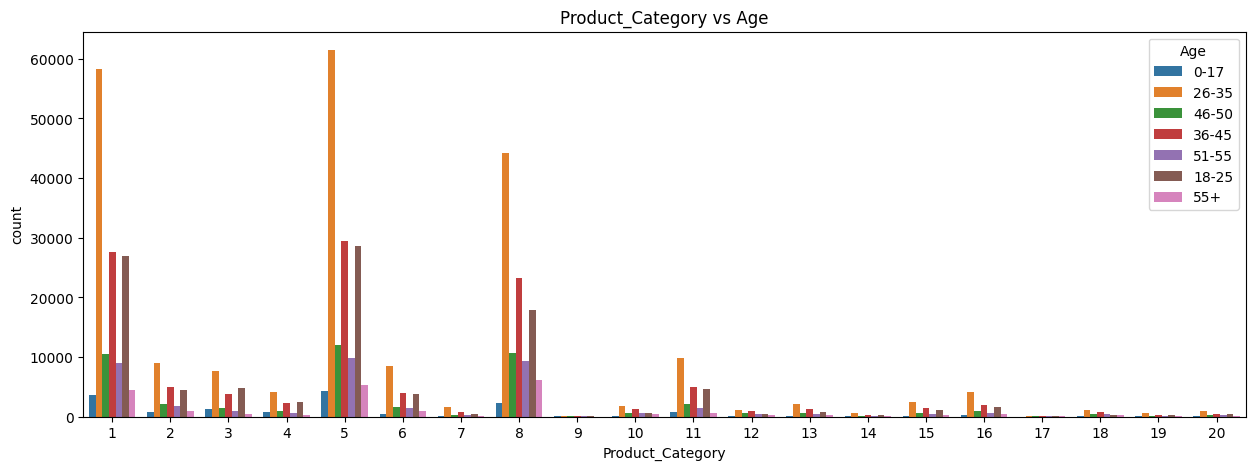

In [ ]:
#To understand which age group likes which product category in the walmart dataset
plt.figure(figsize=(15,5))
sns.countplot(x = df['Product_Category'], hue = df['Age'])
plt.title('Product_Category vs Age')
plt.show()

From the above picture it is clear that in all product categories, the presence of customers with age group 26 - 35 is very high. This trend is then followed by customers with 36 - 45 age category, and then customers with age category 18 - 25. The presence of Customers with age category 0 - 17 is less in all the product category, this simply means that walmart has less customers whose age is in between 0 - 17. At last, product category 9 and 17 are less often opted by the walmart customers.

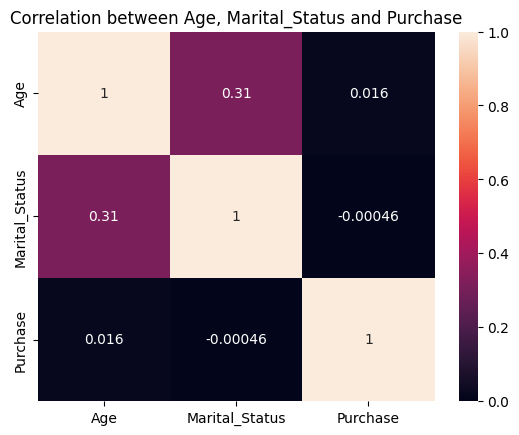

In [ ]:
#Correlation between age, marital status and purchase
category = pd.DataFrame()
category['Age'] = df['Age'].astype('category').cat.codes #Replace categorical columns such as 0 - 17, 18 - 25 into a single integer values like 0, 1 etc., acts like a categorical column.
category['Marital_Status'] = df['Marital_Status'].astype('category').cat.codes #Marital status is also converted the same way as Age column.
category['Purchase'] = df['Purchase']
sns.heatmap(category.corr(), annot=True)
plt.title('Correlation between Age, Marital_Status and Purchase')
plt.show()

The correlation between 3 variables are shown in the above picture. The diagonal values represents when a variable is correlated to itself. The values above the diagonal and below the diagonal are same. To understand this in detail we are only considering the values below the diagonal elements.

<B>Marital Status and Age</B> -> These 2 variables are slightly positively correlated with a value of 0.31, which shows that they are slightly dependent.

<B>Purchase and Age</B> -> These 2 variables are almost independent as their correlated value is 0.016 which is very near to 0.

<B>Purchase and Marital Status</B> -> These 2 variables are totally independent as their correlated value is -0.00046 which is so close to 0.

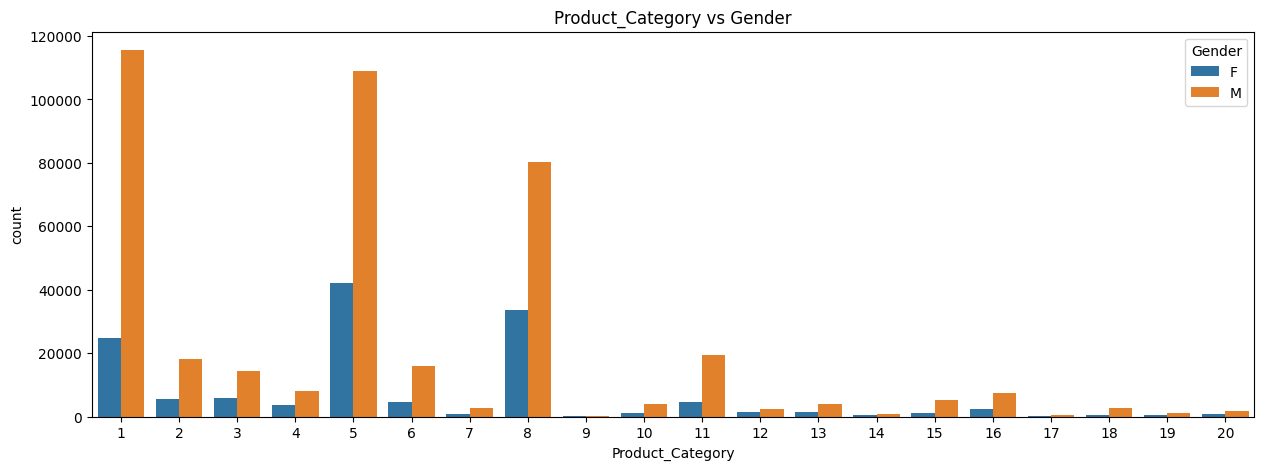

In [ ]:
#This plot gives the gist of how gender impacts on product category
plt.figure(figsize=(15,5))
sns.countplot(x = df['Product_Category'], hue = df['Gender'])
plt.title('Product_Category vs Gender')
plt.show()

From the above picture it is clear that in all product categories, the presence of male customers are high, followed by females. Both males and females like to purchase product that belongs to the category 1, 5 and 8. Male customers are highly interested in the product category 1 followed by 5 and then 8. While females are attracted to the product category 5 followed by 8 and then 1. In addition, product category 9 and 17 are less often opted by both males and females.

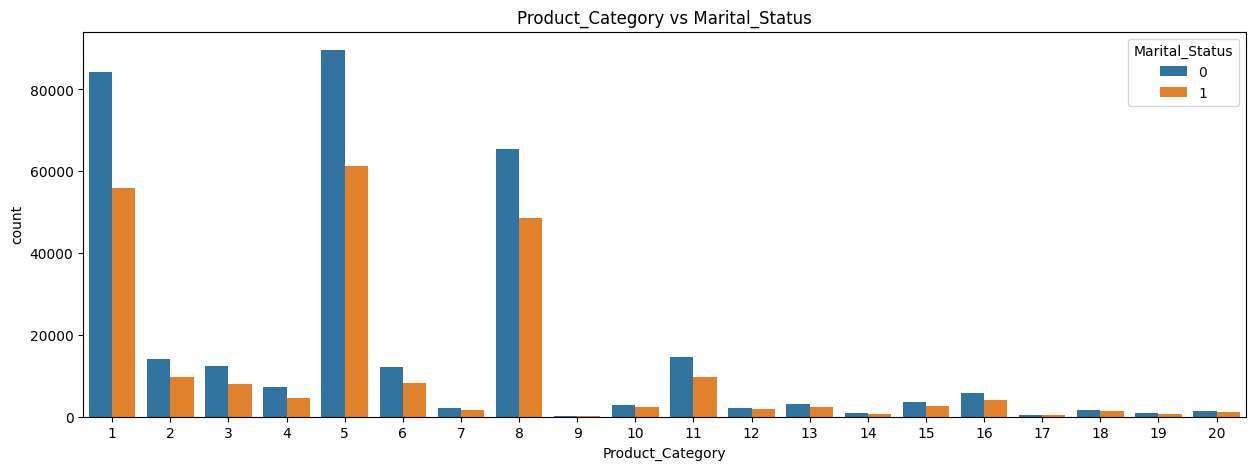

In [ ]:
#This plot gives the gist of how marital status impacts on product category
plt.figure(figsize=(15,5))
sns.countplot(x = df['Product_Category'], hue = df['Marital_Status'])
plt.title('Product_Category vs Marital_Status')
plt.show()

From the above picture it is clear that in all product categories, the presence of unmarried customers are high, followed by married. Both unmarried and married customers like to purchase product that belongs to the category 1, 5 and 8. They are highly interested in the product category 5 followed by 1 and then 8. In addition, product category 9 are less often opted by both married and unmarried customers.

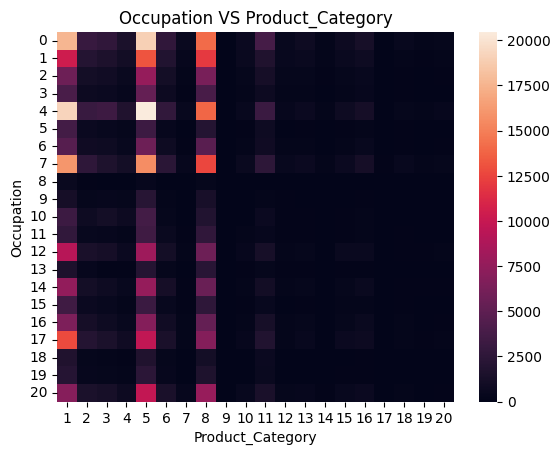

In [ ]:
#A heatmap to check the impact of occupation on Product Category
Occupation_Product_Category = pd.crosstab(df['Occupation'], df['Product_Category'])
sns.heatmap(Occupation_Product_Category)
plt.title('Occupation VS Product_Category')
plt.show()

The majority of the customers with various occupation category chooses product with categories 1, 5 and 8. The customers with occupation category 4 has opted product category for more than 20,000 times. The occupation category 8 may or may not choose any of these product categories but less than 2500 times. Furthermore, product category from 12 to 20 has opted by various occupation categories but less than 2500 times.

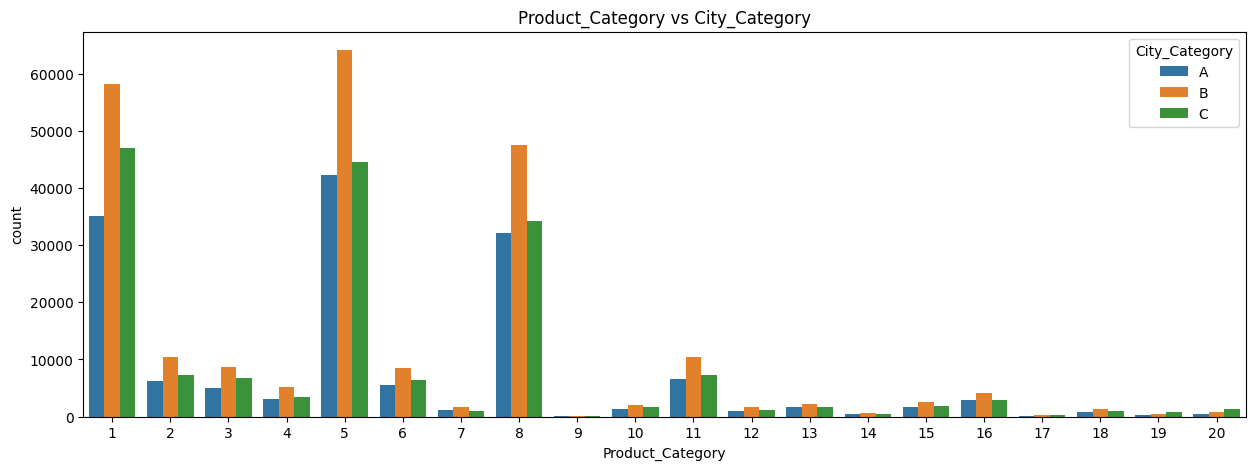

In [ ]:
#This plot gives the gist of how city category impacts on product category
plt.figure(figsize=(15,5))
sns.countplot(x = df['Product_Category'], hue = df['City_Category'])
plt.title('Product_Category vs City_Category')
plt.show()

From the above picture it is clear that in all product categories, the presence of customers from city category <B>B</B> is very high, followed by city category <B>C</B> and then City category <B>A</B>. The customers from each of the city categories like to purchase product that belongs to the category 1, 5 and 8. The customers from <B>B</B> and <B>A</B> city category are highly interested in the product category 5 followed by 1 and then 8. On the other hand, the customers from <B>C</B> city category are highly attracted to product category 1, followed by 2 and then 3. In addition, product category 9 are less often opted by the customers from these 3 city categories.

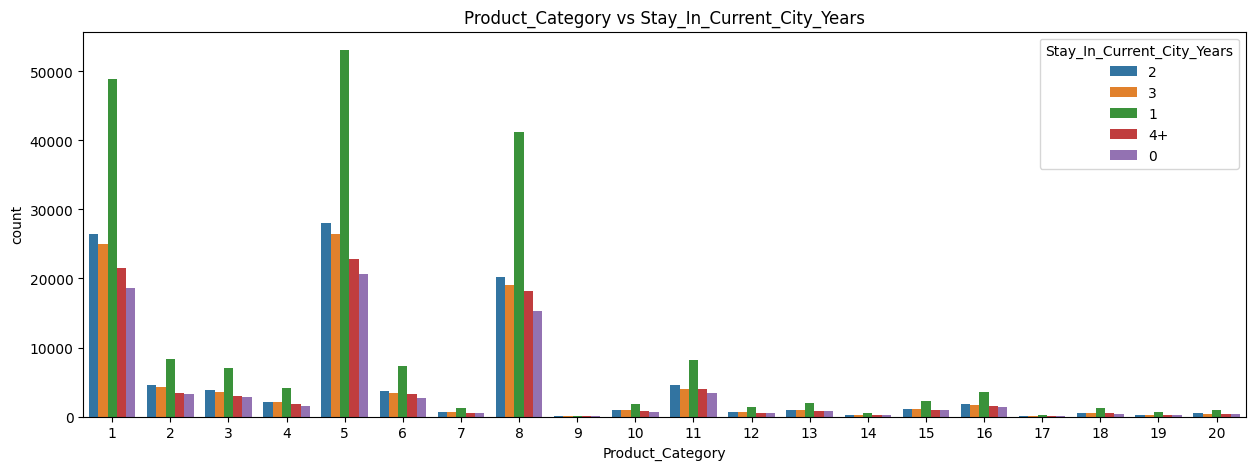

In [ ]:
#This plot gives the gist of how stay in current city years impacts on product category
plt.figure(figsize=(15,5))
sns.countplot(x = df['Product_Category'], hue = df['Stay_In_Current_City_Years'])
plt.title('Product_Category vs Stay_In_Current_City_Years')
plt.show()

The majority of the customers with various stay in current city years chooses product with categories 1, 5 and 8. The customers with stay in current city years for 1 year has purchased most of the walmart products followed by stay in current city years 2 years, then 3 years, then 4+ years and finally 0 years (or several months). Furthermore, product category 9 is least opted by customers with all years category.

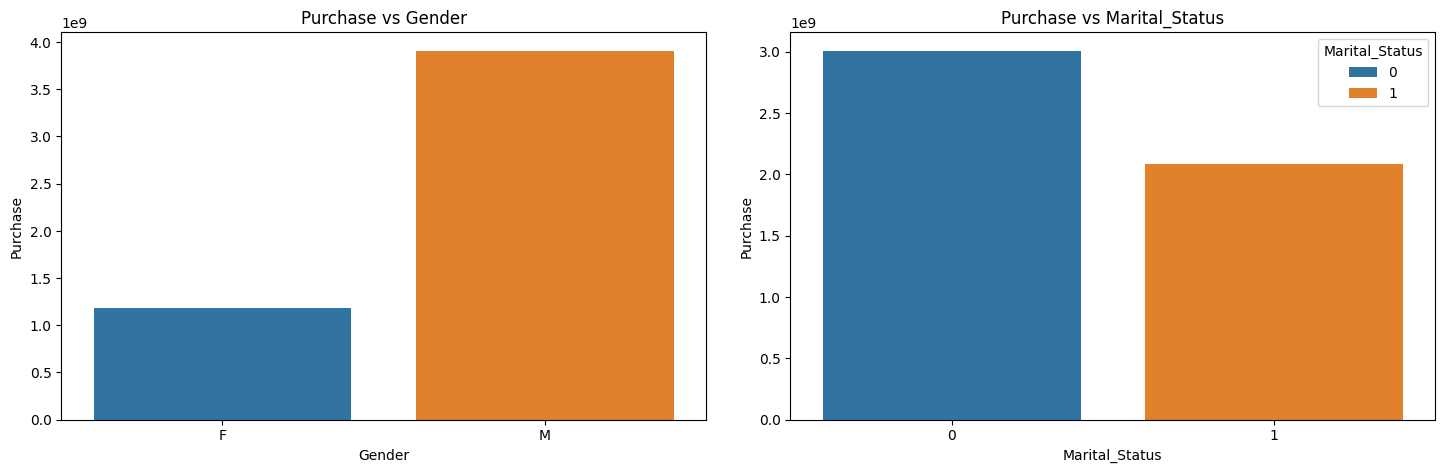

In [ ]:
#Total amount spend by each gender categories and each marital status categories
fig, axis = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15, 5)
fig.tight_layout(pad=3.0)
#Total amount spend by each gender categories
Gender_Purchase = df.groupby('Gender')['Purchase'].sum().reset_index()
sns.barplot(x = 'Gender', y = 'Purchase', hue='Gender', data = Gender_Purchase, ax=axis[0])
axis[0].set_title('Purchase vs Gender')
#Total amount spend by each marital status categories
Marital_Purchase = df.groupby('Marital_Status')['Purchase'].sum().reset_index()
sns.barplot(x = 'Marital_Status', y = 'Purchase', hue = 'Marital_Status', data = Marital_Purchase, ax=axis[1])
axis[1].set_title('Purchase vs Marital_Status')

plt.show()

These 2 analysis are independent and consider's gender and marital status are independent variables. The top left corner has a mathematical notation <B>le9</B>. It represents 10 to the power of 9. For example, if we have 1.2le9 then the equivalent number for the same is 1.2*(10^9) approximately equivalent to 1 billion

<B>Purchase vs Gender</B> -> Walmart recieves around 1 billion dollars from its female customers, whereas they recieve around 3 billion dollars from its males customers which is 3 times higher than the female customers.

<B>Purchase vs Marital Status</B> -> Walmart recieves around 3 billion dollars from its unmarried customers, whereas they recieve around 2 billion dollars from its married customers.

<H1><font color = 'orange'>Confidence Interval and Bootsrapping</font></H1>

In [ ]:
# This function calculates the confidence interval using mean, std. deviation, size and confidence
# Here size is considered to be the original size of the given dataset, for eg: if we have 1000 customers we will use the size as 1000 itself.
def calc_CI(mean, std, N, confidence):

  #Calculation of std error
  std_err = std / np.sqrt(N)

  # calculate the remaining fractions beyond interval (we know 95% so fractions will be 2.5% each so 0.025)
  slice = (1 - (confidence/100))/2

  #Calculation of Z- Score
  z1 = norm.ppf(slice)
  z2 = norm.ppf(1-slice)

  #Calculation of CI range end points
  x1 = mean + (z1 * std_err)
  x2 = mean + (z2 * std_err)

  return x1, x2

In [ ]:
#A Bootstrapping function to create samples of various size from the passing data and create a list of means from it
def mean_confidence_interval(data):
  bootstrapped_means_sample_300 = []
  bootstrapped_means_sample_3000 = []
  bootstrapped_means_sample_30000 = []
  #loop to create 10,000 samples of size 300 and calculate its mean and store it in a variable
  for reps in range(10000):
    bootstrapped_samples = np.random.choice(data, size=300)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_sample_300.append(bootstrapped_mean)
  #loop to create 10,000 samples of size 3000 and calculate its mean and store it in a variable
  for reps in range(10000):
    bootstrapped_samples = np.random.choice(data, size=3000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_sample_3000.append(bootstrapped_mean)
  #loop to create 10,000 samples of size 30000 and calculate its mean and store it in a variable
  for reps in range(10000):
    bootstrapped_samples = np.random.choice(data, size=30000)
    bootstrapped_mean = np.mean(bootstrapped_samples)
    bootstrapped_means_sample_30000.append(bootstrapped_mean)
  #return sample means of various sample size's 300, 3000, 30,000
  return bootstrapped_means_sample_300, bootstrapped_means_sample_3000, bootstrapped_means_sample_30000

In [ ]:
#A function that is used after bootstrapping to calculate the confidence interval for sample means with different sample sizes with 95% of confidence.
def percentage_confidence_interval(bootstrapped_means_sample_300, bootstrapped_means_sample_3000, bootstrapped_means_sample_30000):
  x1_300 = np.percentile(bootstrapped_means_sample_300, 2.5)
  x2_300 = np.percentile(bootstrapped_means_sample_300, 97.5)

  x1_3000 = np.percentile(bootstrapped_means_sample_3000, 2.5)
  x2_3000 = np.percentile(bootstrapped_means_sample_3000, 97.5)

  x1_30000 = np.percentile(bootstrapped_means_sample_30000, 2.5)
  x2_30000 = np.percentile(bootstrapped_means_sample_30000, 97.5)

  return x1_300, x2_300, x1_3000, x2_3000, x1_30000, x2_30000

<H1><font color = 'orange'>How does gender affect the amount spent?</font></H1>

<H3><font color = 'orange'>Calculation of gender CI with the whole data</font></H3>

In [ ]:
femaleAmount = df[df['Gender'] == 'F'] # differentiating the dataset based on Gender - Female
maleAmount = df[df['Gender'] == 'M'] # differentiating the dataset based on Gender - Male

#Calculating the mean, std. deviation and calling the confidence interval function for female dataset
mean = femaleAmount['Purchase'].mean()
std = femaleAmount['Purchase'].std()
N = len(femaleAmount['Purchase'])
confidence = 95
x1_female, x2_female = calc_CI(mean, std, N, confidence)
print("Female CI : (", x1_female, ",",x2_female,"| width : ",x2_female - x1_female,")")

#Calculating the mean, std. deviation and calling the confidence interval function for male dataset
mean = maleAmount['Purchase'].mean()
std = maleAmount['Purchase'].std()
N = len(maleAmount['Purchase'])
confidence = 95
x1_male, x2_male = calc_CI(mean, std, N, confidence)

print("Male CI   : (", x1_male, ",",x2_male,"| width : ",x2_male - x1_male,")")

Female CI : ( 8709.21154714068 , 8759.919983170272 | width :  50.70843602959212 )
Male CI   : ( 9422.01944736257 , 9453.032633581959 | width :  31.013186219388444 )


This figure shows that with 95% confidence we can conclude that the population mean of purchase amount for female customers lies in between 8709.21 and 8759.91. We can also say that with 95% of confidence the population mean of purchase amount for male customers lies in between 9422.02 and 9453.03. <B>The female customers CI does not overlaps with CI of male customers</B>

<B>Q: Is the confidence interval computed using the entire dataset wider for
one of the genders? Why is this the case?</B>

A: <B>Yes</B>, the CI is wider for males compared to the females. This is because the presence of female customers are low in walmart dataset. Alongside, with this the spending pattern of females are low compared to males. It is clear from the above figure that the female's width is around 50, while male's width is approximately 31. Due to insufficient data for female candidate, the CI width is higher compared to males.

<H3><font color = 'orange'>Calculation of gender CI with the bootstrapped samples of various sizes</font></H3>

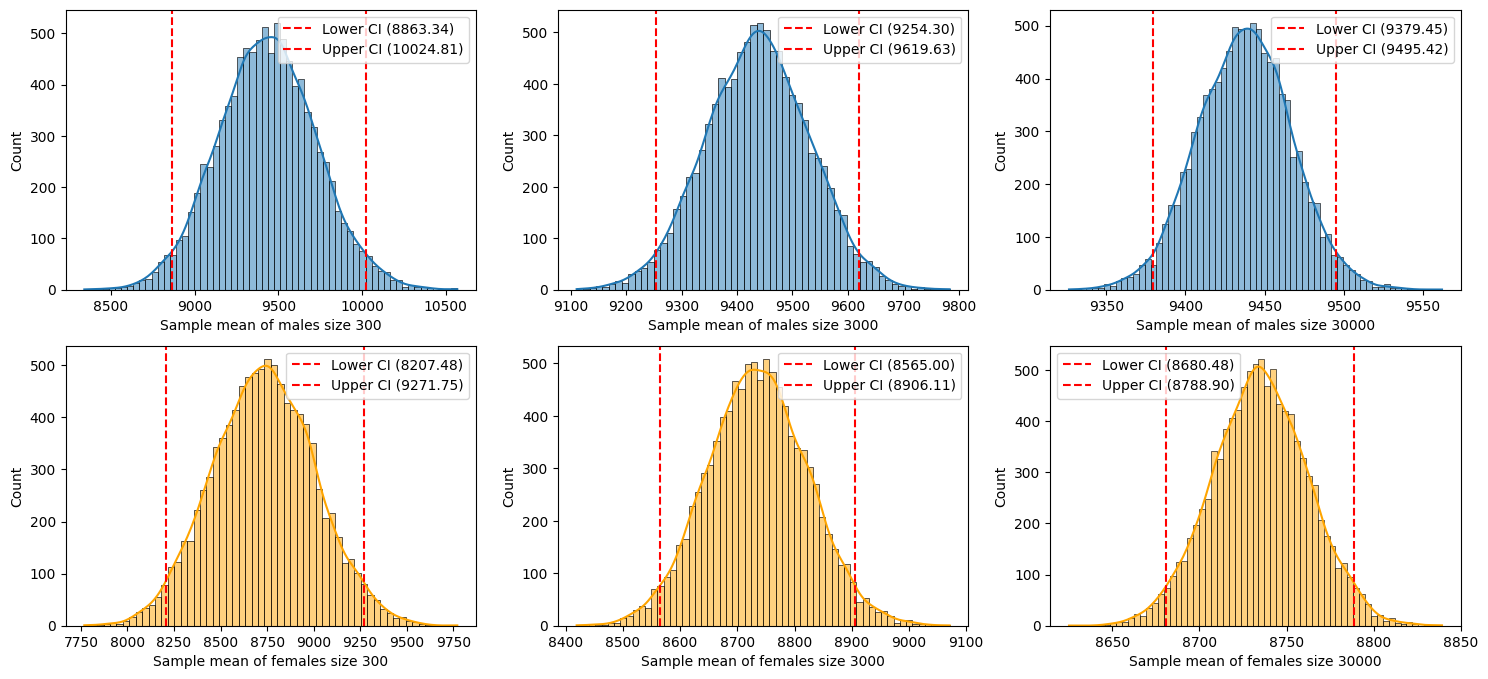

In [ ]:
#Calling mean_confidence_interval for bootstrapped female means of sample sizes 300, 3000 and 30,000
bootstrapped_femalemeans_sample_300, bootstrapped_femalemeans_sample_3000, bootstrapped_femalemeans_sample_30000 = mean_confidence_interval(femaleAmount['Purchase'])

#Calculating the confidence interval end points for females with sample size 300, 3000 and 30,000
x1_female_300, x2_female_300, x1_female_3000, x2_female_3000, x1_female_30000, x2_female_30000 = percentage_confidence_interval(bootstrapped_femalemeans_sample_300, bootstrapped_femalemeans_sample_3000, bootstrapped_femalemeans_sample_30000)

#Calling mean_confidence_interval for bootstrapped male means of sample sizes 300, 3000 and 30,000
bootstrapped_malemeans_sample_300, bootstrapped_malemeans_sample_3000, bootstrapped_malemeans_sample_30000 = mean_confidence_interval(maleAmount['Purchase'])

#Calculating the confidence interval end points for males with sample size 300, 3000 and 30,000
x1_male_300, x2_male_300, x1_male_3000, x2_male_3000, x1_male_30000, x2_male_30000 = percentage_confidence_interval(bootstrapped_malemeans_sample_300, bootstrapped_malemeans_sample_3000, bootstrapped_malemeans_sample_30000)

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(18, 8))

#histogram for bootstrapped males means with sample size 300, alongside with the CI
sns.histplot(bootstrapped_malemeans_sample_300, kde=True, ax=ax[0,0])
ax[0,0].axvline(x=x1_male_300, color='r', linestyle='--', label=f'Lower CI ({x1_male_300:.2f})')
ax[0,0].axvline(x=x2_male_300, color='r', linestyle='--', label=f'Upper CI ({x2_male_300:.2f})')
ax[0,0].set_xlabel('Sample mean of males size 300')
ax[0,0].legend()

#histogram for bootstrapped males means with sample size 3000, alongside with the CI
sns.histplot(bootstrapped_malemeans_sample_3000, kde=True, ax=ax[0,1])
ax[0,1].axvline(x=x1_male_3000, color='r', linestyle='--', label=f'Lower CI ({x1_male_3000:.2f})')
ax[0,1].axvline(x=x2_male_3000, color='r', linestyle='--', label=f'Upper CI ({x2_male_3000:.2f})')
ax[0,1].set_xlabel('Sample mean of males size 3000')
ax[0,1].legend()

#histogram for bootstrapped males means with sample size 30,000, alongside with the CI
sns.histplot(bootstrapped_malemeans_sample_30000, kde=True, ax=ax[0,2])
ax[0,2].axvline(x=x1_male_30000, color='r', linestyle='--', label=f'Lower CI ({x1_male_30000:.2f})')
ax[0,2].axvline(x=x2_male_30000, color='r', linestyle='--', label=f'Upper CI ({x2_male_30000:.2f})')
ax[0,2].set_xlabel('Sample mean of males size 30000')
ax[0,2].legend()

#histogram for bootstrapped females means with sample size 300, alongside with the CI
sns.histplot(bootstrapped_femalemeans_sample_300, color='orange', kde=True, ax=ax[1,0])
ax[1,0].axvline(x=x1_female_300, color='r', linestyle='--', label=f'Lower CI ({x1_female_300:.2f})')
ax[1,0].axvline(x=x2_female_300, color='r', linestyle='--', label=f'Upper CI ({x2_female_300:.2f})')
ax[1,0].set_xlabel('Sample mean of females size 300')
ax[1,0].legend()

#histogram for bootstrapped females means with sample size 3000, alongside with the CI
sns.histplot(bootstrapped_femalemeans_sample_3000, color='orange', kde=True, ax=ax[1,1])
ax[1,1].axvline(x=x1_female_3000, color='r', linestyle='--', label=f'Lower CI ({x1_female_3000:.2f})')
ax[1,1].axvline(x=x2_female_3000, color='r', linestyle='--', label=f'Upper CI ({x2_female_3000:.2f})')
ax[1,1].set_xlabel('Sample mean of females size 3000')
ax[1,1].legend()

#histogram for bootstrapped females means with sample size 30,000, alongside with the CI
sns.histplot(bootstrapped_femalemeans_sample_30000, color='orange', kde=True, ax=ax[1,2])
ax[1,2].axvline(x=x1_female_30000, color='r', linestyle='--', label=f'Lower CI ({x1_female_30000:.2f})')
ax[1,2].axvline(x=x2_female_30000, color='r', linestyle='--', label=f'Upper CI ({x2_female_30000:.2f})')
ax[1,2].set_xlabel('Sample mean of females size 30000')
ax[1,2].legend()
plt.show()

<B>Q: How is the width of the confidence interval affected by the sample size?</B>

A: As the sample size increases the CI range decreases. In other words, <B>CI of sample mean of males size 30,000 < CI of sample mean of males size 3000 < CI of sample mean of males size 300.</B> This is the same case with respect to females as well. <B>CI of sample mean of females size 30,000 < CI of sample mean of females size 3000 < CI of sample mean of females size 300.</B> This is directly visible in the above picture.

<B>Q: How does the sample size affect the shape of the distributions of the
means?</B>

A: The bell shaped curve becomes smoother and smoother as the sample size increases. That means, the smoothness of the curve is higher for sample mean of males size 30,000 followed by sample mean of males size 3000 with slightly less smooth curve followed by sample mean of males size 300 little more less smooth curve. This same trend is also seen in females when the sample size increases



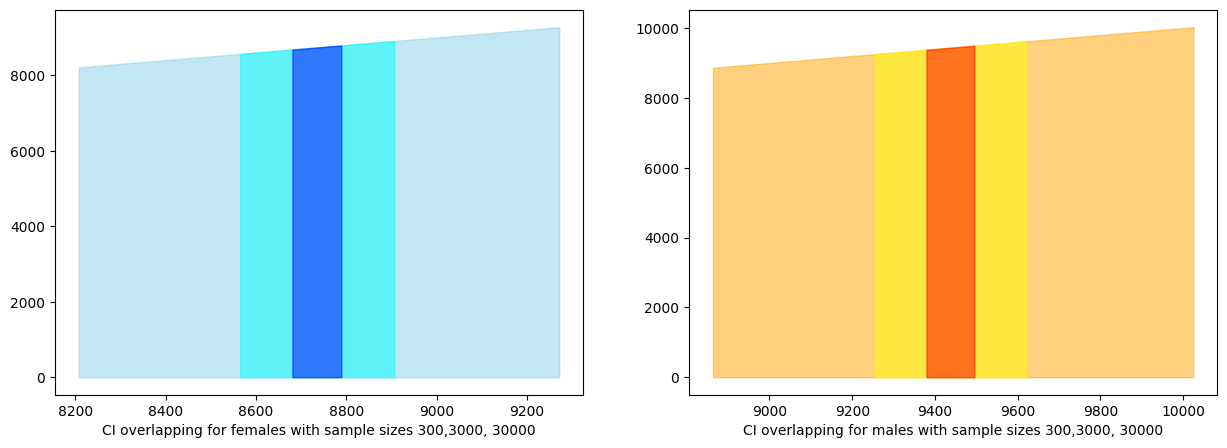

In [ ]:
#To check for the CI with various sample sizes overlap or not
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))

#Created various values between CI range from lower CI to Upper CI for sample size 300, 3000, 30000 for female customers
samples_Fdiscrete_300 = np.arange(x1_female_300, x2_female_300, 0.1)
samples_Fdiscrete_3000 = np.arange(x1_female_3000, x2_female_3000, 0.1)
samples_Fdiscrete_30000 = np.arange(x1_female_30000, x2_female_30000, 0.1)
ax[0].fill_between(samples_Fdiscrete_300, samples_Fdiscrete_300, color='skyblue', alpha=0.5)
ax[0].fill_between(samples_Fdiscrete_3000, samples_Fdiscrete_3000, color='cyan', alpha=0.5)
ax[0].fill_between(samples_Fdiscrete_30000, samples_Fdiscrete_30000, color='blue', alpha=0.5)
ax[0].set_xlabel('CI overlapping for females with sample sizes 300,3000, 30000')

#Created various values between CI range from lower CI to Upper CI for sample size 300, 3000, 30000 for male customers
samples_Mdiscrete_300 = np.arange(x1_male_300, x2_male_300, 0.1)
samples_Mdiscrete_3000 = np.arange(x1_male_3000, x2_male_3000, 0.1)
samples_Mdiscrete_30000 = np.arange(x1_male_30000, x2_male_30000, 0.1)
ax[1].fill_between(samples_Mdiscrete_300, samples_Mdiscrete_300, color='orange', alpha=0.5)
ax[1].fill_between(samples_Mdiscrete_3000, samples_Mdiscrete_3000, color='yellow', alpha=0.5)
ax[1].fill_between(samples_Mdiscrete_30000, samples_Mdiscrete_30000, color='red', alpha=0.5)
ax[1].set_xlabel('CI overlapping for males with sample sizes 300,3000, 30000')

plt.show()

<B>Q: Do the confidence intervals for different sample sizes overlap?</B>

A: The CI of females with sample sizes 300 is overlapped with females of sample sizes 3000 and then it is again overlapped with females of sample sizes 30000. The above picture on the left side affirms the same. In this picture, skyblue color indicates that the area formed by CI with sample size 300, followed by cyan color indicates that the area formed by CI with sample size 3000 and this is again followed by blue color indicates that the area formed by CI with sample size 300The area where the graphs overlap indicates the range of values that are common to all 3 distributions, showing that they are overlapping each other. The same trend can also be observed with male customers on the right side.

<H1><font color = 'orange'>How does Marital_Status affect the amount spent?</font></H1>

<H3><font color = 'orange'>Calculation of marital status CI with the whole data</font></H3>

In [ ]:
maritalStatus_single = df[df['Marital_Status'] == 0] # differentiating the dataset based on Marital_Status - Single
maritalStatus_married = df[df['Marital_Status'] == 1] # differentiating the dataset based on Marital_Status - Married

#Calculating the mean, std. deviation and calling the confidence interval function for married dataset
mean = maritalStatus_married['Purchase'].mean()
std = maritalStatus_married['Purchase'].std()
N = len(maritalStatus_married['Purchase'])
confidence = 95
x1_married, x2_married = calc_CI(mean, std, N, confidence)
print("Married CI : (", x1_married, ",",x2_married,"| width : ",x2_married - x1_married,")")

#Calculating the mean, std. deviation and calling the confidence interval function for singles dataset
mean = maritalStatus_single['Purchase'].mean()
std = maritalStatus_single['Purchase'].std()
N = len(maritalStatus_single['Purchase'])
confidence = 95
x1_single, x2_single = calc_CI(mean, std, N, confidence)

print("Single CI  : (", x1_single, ",",x2_single," | width : ",x2_single - x1_single,")")

Married CI : ( 9240.460427057078 , 9281.888721107669 | width :  41.42829405059092 )
Single CI  : ( 9248.61641818668 , 9283.198819656332  | width :  34.58240146965181 )


This figure shows that with 95% confidence we can conclude that the population mean of purchase amount for married customers lies in between 9240.46 and 9281.88. We can also say that with 95% of confidence the population mean of purchase amount for unmarried customers or singles lies in between 9248.61, 9283.19. <B>The married customers CI overlaps with unmarried customers</B>

<B>Q: Is the confidence interval computed using the entire dataset wider for
one of the marital status? Why is this the case?</B>

A: <B>Yes</B>, the CI is wider for married customers compared to the unmarried customers. This is because the presence of married customers are low in walmart dataset. Alongside, with this the spending pattern of married customers are low compared to unmarried customers. It is clear from the above figure that the married customer's width is around 41, while unmarried customer's width is approximately 34. Due to insufficient data for married candidates, the CI width is higher compared to singles.

<H3><font color = 'orange'>Calculation of marital status CI with the bootstrapped samples of various sizes</font></H3>

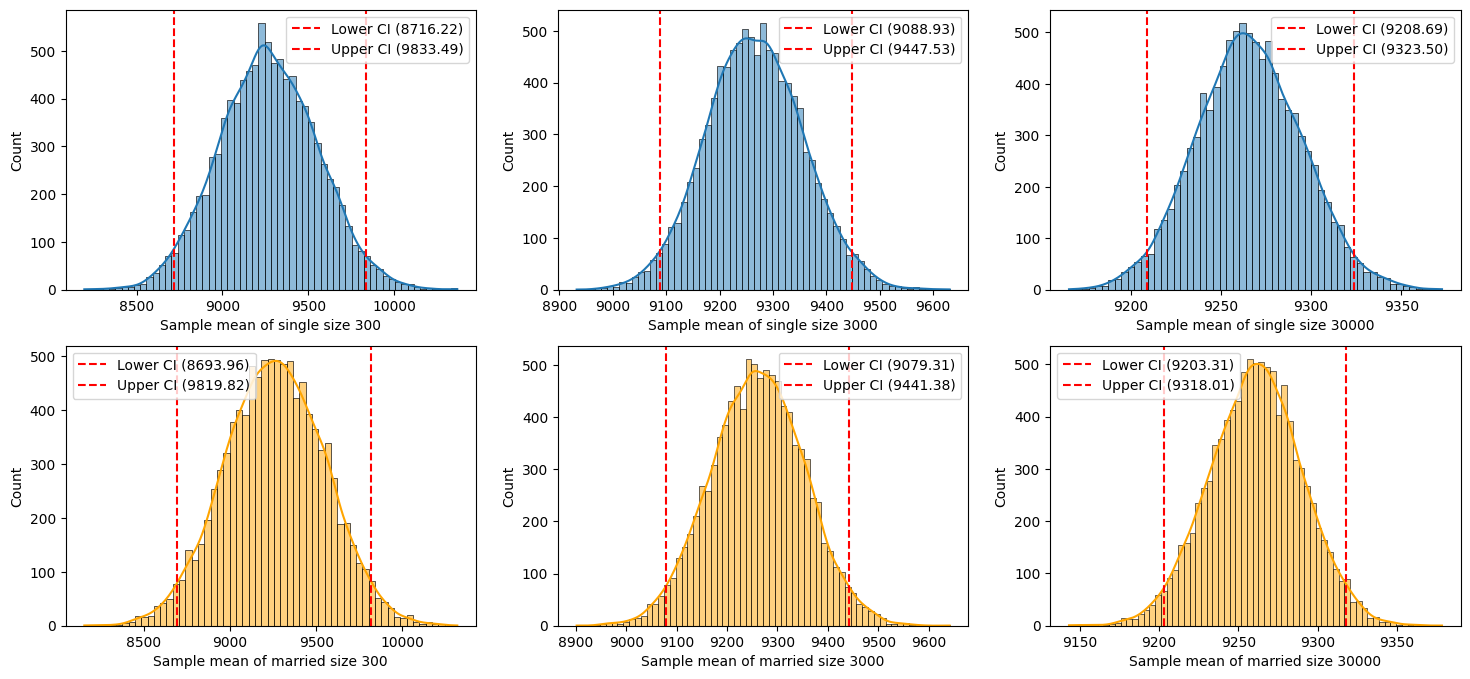

In [ ]:
#Calling mean_confidence_interval for bootstrapped married customer means of sample sizes 300, 3000 and 30,000
bootstrapped_marriedmeans_sample_300, bootstrapped_marriedmeans_sample_3000, bootstrapped_marriedmeans_sample_30000 = mean_confidence_interval(maritalStatus_married['Purchase'])

#Calculating the confidence interval end points for married customers with sample size 300, 3000 and 30,000
x1_married_300, x2_married_300, x1_married_3000, x2_married_3000, x1_married_30000, x2_married_30000 = percentage_confidence_interval(bootstrapped_marriedmeans_sample_300, bootstrapped_marriedmeans_sample_3000, bootstrapped_marriedmeans_sample_30000)

#Calling mean_confidence_interval for bootstrapped single customer means of sample sizes 300, 3000 and 30,000
bootstrapped_singlemeans_sample_300, bootstrapped_singlemeans_sample_3000, bootstrapped_singlemeans_sample_30000 = mean_confidence_interval(maritalStatus_single['Purchase'])

#Calculating the confidence interval end points for singles with sample size 300, 3000 and 30,000
x1_single_300, x2_single_300, x1_single_3000, x2_single_3000, x1_single_30000, x2_single_30000 = percentage_confidence_interval(bootstrapped_singlemeans_sample_300, bootstrapped_singlemeans_sample_3000, bootstrapped_singlemeans_sample_30000)

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(18, 8))

#histogram for bootstrapped singles means with sample size 300, alongside with the CI
sns.histplot(bootstrapped_singlemeans_sample_300, kde=True, ax=ax[0,0])
ax[0,0].axvline(x=x1_single_300, color='r', linestyle='--', label=f'Lower CI ({x1_single_300:.2f})')
ax[0,0].axvline(x=x2_single_300, color='r', linestyle='--', label=f'Upper CI ({x2_single_300:.2f})')
ax[0,0].set_xlabel('Sample mean of single size 300')
ax[0,0].legend()

#histogram for bootstrapped singles means with sample size 3000, alongside with the CI
sns.histplot(bootstrapped_singlemeans_sample_3000, kde=True, ax=ax[0,1])
ax[0,1].axvline(x=x1_single_3000, color='r', linestyle='--', label=f'Lower CI ({x1_single_3000:.2f})')
ax[0,1].axvline(x=x2_single_3000, color='r', linestyle='--', label=f'Upper CI ({x2_single_3000:.2f})')
ax[0,1].set_xlabel('Sample mean of single size 3000')
ax[0,1].legend()

#histogram for bootstrapped singles means with sample size 30,000, alongside with the CI
sns.histplot(bootstrapped_singlemeans_sample_30000, kde=True, ax=ax[0,2])
ax[0,2].axvline(x=x1_single_30000, color='r', linestyle='--', label=f'Lower CI ({x1_single_30000:.2f})')
ax[0,2].axvline(x=x2_single_30000, color='r', linestyle='--', label=f'Upper CI ({x2_single_30000:.2f})')
ax[0,2].set_xlabel('Sample mean of single size 30000')
ax[0,2].legend()

#histogram for bootstrapped married means with sample size 300, alongside with the CI
sns.histplot(bootstrapped_marriedmeans_sample_300, color='orange', kde=True, ax=ax[1,0])
ax[1,0].axvline(x=x1_married_300, color='r', linestyle='--', label=f'Lower CI ({x1_married_300:.2f})')
ax[1,0].axvline(x=x2_married_300, color='r', linestyle='--', label=f'Upper CI ({x2_married_300:.2f})')
ax[1,0].set_xlabel('Sample mean of married size 300')
ax[1,0].legend()

#histogram for bootstrapped married means with sample size 3000, alongside with the CI
sns.histplot(bootstrapped_marriedmeans_sample_3000, color='orange', kde=True, ax=ax[1,1])
ax[1,1].axvline(x=x1_married_3000, color='r', linestyle='--', label=f'Lower CI ({x1_married_3000:.2f})')
ax[1,1].axvline(x=x2_married_3000, color='r', linestyle='--', label=f'Upper CI ({x2_married_3000:.2f})')
ax[1,1].set_xlabel('Sample mean of married size 3000')
ax[1,1].legend()

#histogram for bootstrapped married means with sample size 30,000, alongside with the CI
sns.histplot(bootstrapped_marriedmeans_sample_30000, color='orange', kde=True, ax=ax[1,2])
ax[1,2].axvline(x=x1_married_30000, color='r', linestyle='--', label=f'Lower CI ({x1_married_30000:.2f})')
ax[1,2].axvline(x=x2_married_30000, color='r', linestyle='--', label=f'Upper CI ({x2_married_30000:.2f})')
ax[1,2].set_xlabel('Sample mean of married size 30000')
ax[1,2].legend()
plt.show()

<B>Q: How is the width of the confidence interval affected by the sample size?</B>

A: As the sample size increases the CI range decreases. In other words, <B>CI of sample mean of singles size 30,000 < CI of sample mean of singles size 3000 < CI of sample mean of singles size 300.</B> This is the same case with respect to married customers as well. <B>CI of sample mean of married size 30,000 < CI of sample mean of married size 3000 < CI of sample mean of married size 300.</B> This is directly visible in the above picture.

<B>Q: How does the sample size affect the shape of the distributions of the
means?</B>

A: The bell shaped curve becomes smoother and smoother as the sample size increases. That means, the smoothness of the curve is higher for sample mean of singles size 30,000 followed by sample mean of singles size 3000 with slightly less smooth curve followed by sample mean of singles size 300 little more less smooth curve. This same trend is also seen in married customers when the sample size increases



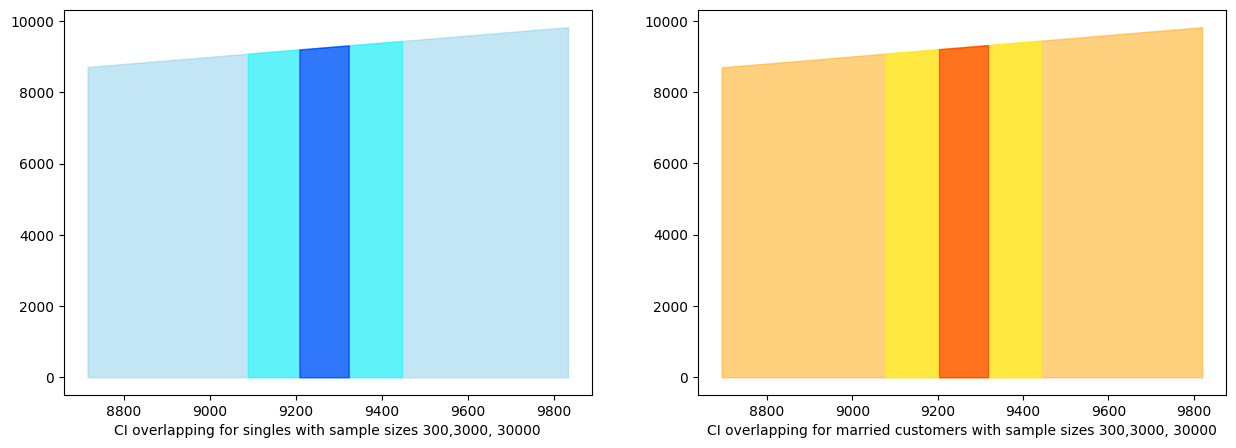

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))

#Created various values between CI range from lower CI to Upper CI for sample size 300, 3000, 30000 for singles customers
samples_Sdiscrete_300 = np.arange(x1_single_300, x2_single_300, 0.1)
samples_Sdiscrete_3000 = np.arange(x1_single_3000, x2_single_3000, 0.1)
samples_Sdiscrete_30000 = np.arange(x1_single_30000, x2_single_30000, 0.1)
ax[0].fill_between(samples_Sdiscrete_300, samples_Sdiscrete_300, color='skyblue', alpha=0.5)
ax[0].fill_between(samples_Sdiscrete_3000, samples_Sdiscrete_3000, color='cyan', alpha=0.5)
ax[0].fill_between(samples_Sdiscrete_30000, samples_Sdiscrete_30000, color='blue', alpha=0.5)
ax[0].set_xlabel('CI overlapping for singles with sample sizes 300,3000, 30000')

#Created various values between CI range from lower CI to Upper CI for sample size 300, 3000, 30000 for married customers
samples_MAdiscrete_300 = np.arange(x1_married_300, x2_married_300, 0.1)
samples_MAdiscrete_3000 = np.arange(x1_married_3000, x2_married_3000, 0.1)
samples_MAdiscrete_30000 = np.arange(x1_married_30000, x2_married_30000, 0.1)
ax[1].fill_between(samples_MAdiscrete_300, samples_MAdiscrete_300, color='orange', alpha=0.5)
ax[1].fill_between(samples_MAdiscrete_3000, samples_MAdiscrete_3000, color='yellow', alpha=0.5)
ax[1].fill_between(samples_MAdiscrete_30000, samples_MAdiscrete_30000, color='red', alpha=0.5)
ax[1].set_xlabel('CI overlapping for married customers with sample sizes 300,3000, 30000')
plt.show()

<B>Q: Do the confidence intervals for different sample sizes overlap?</B>

A: The CI of singles with sample sizes 300 is overlapped with singles of sample sizes 3000 and then it is again overlapped with singles of sample sizes 30000. The above picture on the left side affirms the same. In this picture, skyblue color indicates that the area formed by CI with sample size 300, followed by cyan color indicates that the area formed by CI with sample size 3000 and this is again followed by blue color indicates that the area formed by CI with sample size 300. The area where the graphs overlap indicates the range of values that are common to all 3 distributions, showing that they are overlapping each other. The same trend can also be observed with married customers on the right side.

<H1><font color = 'orange'>How does Age affect the amount spent?</font></H1>

<H3><font color = 'orange'>Calculation of Age CI with the whole data</font></H3>

In [ ]:
Age_0_17 = df[df['Age'] == '0-17'] # differentiating the dataset based on Age 0 to 17
Age_18_25 = df[df['Age'] == '18-25'] # differentiating the dataset based on Age 18 to 25
Age_26_35 = df[df['Age'] == '26-35'] # differentiating the dataset based on Age 26 to 35
Age_36_45 = df[df['Age'] == '36-45'] # differentiating the dataset based on Age 36 to 45
Age_46_50 = df[df['Age'] == '46-50'] # differentiating the dataset based on Age 46 to 50
Age_51_55 = df[df['Age'] == '51-55'] # differentiating the dataset based on Age 51 to 55
Age_55_plus = df[df['Age'] == '55+'] # differentiating the dataset based on Age 55+

#Calculating the mean, std. deviation and calling the confidence interval function for customers with age group 0 to 17

mean = Age_0_17['Purchase'].mean()
std = Age_0_17['Purchase'].std()
N = len(Age_0_17['Purchase'])
confidence = 95
x1_Age_0_17, x2_Age_0_17 = calc_CI(mean, std, N, confidence)
print("Age 0-17 CI   : (", x1_Age_0_17, ",",x2_Age_0_17,"| width : ",x2_Age_0_17 - x1_Age_0_17,")")

#Calculating the mean, std. deviation and calling the confidence interval function for customers with age group 18 to 25
mean = Age_18_25['Purchase'].mean()
std = Age_18_25['Purchase'].std()
N = len(Age_18_25['Purchase'])
confidence = 95
x1_Age_18_25, x2_Age_18_25 = calc_CI(mean, std, N, confidence)
print("Age 18-25 CI  : (", x1_Age_18_25, ",",x2_Age_18_25,"| width : ",x2_Age_18_25 - x1_Age_18_25,")")

#Calculating the mean, std. deviation and calling the confidence interval function for customers with age group 26 to 35
mean = Age_26_35['Purchase'].mean()
std = Age_26_35['Purchase'].std()
N = len(Age_26_35['Purchase'])
confidence = 95
x1_Age_26_35, x2_Age_26_35 = calc_CI(mean, std, N, confidence)
print("Age 26-35 CI  : (", x1_Age_26_35, ",",x2_Age_26_35,"| width : ",x2_Age_26_35 - x1_Age_26_35,")")

#Calculating the mean, std. deviation and calling the confidence interval function for customers with age group 36 to 45
mean = Age_36_45['Purchase'].mean()
std = Age_36_45['Purchase'].std()
N = len(Age_36_45['Purchase'])
confidence = 95
x1_Age_36_45, x2_Age_36_45 = calc_CI(mean, std, N, confidence)
print("Age 36-45 CI  : (", x1_Age_36_45, ",",x2_Age_36_45,"| width : ",x2_Age_36_45 - x1_Age_36_45,")")

#Calculating the mean, std. deviation and calling the confidence interval function for customers with age group 46 to 50
mean = Age_46_50['Purchase'].mean()
std = Age_46_50['Purchase'].std()
N = len(Age_46_50['Purchase'])
confidence = 95
x1_Age_46_50, x2_Age_46_50 = calc_CI(mean, std, N, confidence)
print("Age 46-50 CI  : (", x1_Age_46_50, ",",x2_Age_46_50,"| width : ",x2_Age_46_50 - x1_Age_46_50,")")

#Calculating the mean, std. deviation and calling the confidence interval function for customers with age group 51 to 55
mean = Age_51_55['Purchase'].mean()
std = Age_51_55['Purchase'].std()
N = len(Age_51_55['Purchase'])
confidence = 95
x1_Age_51_55, x2_Age_51_55 = calc_CI(mean, std, N, confidence)
print("Age 51-55 CI  : (", x1_Age_51_55, ",",x2_Age_51_55,"| width : ",x2_Age_51_55 - x1_Age_51_55,")")

#Calculating the mean, std. deviation and calling the confidence interval function for customers with age group 55+
mean = Age_55_plus['Purchase'].mean()
std = Age_55_plus['Purchase'].std()
N = len(Age_55_plus['Purchase'])
confidence = 95
x1_Age_55_plus, x2_Age_55_plus = calc_CI(mean, std, N, confidence)
print("Age 55+ CI    : (", x1_Age_55_plus, ",",x2_Age_55_plus," | width : ",x2_Age_55_plus - x1_Age_55_plus,")")


Age 0-17 CI   : ( 8851.947970542686 , 9014.981310347262 | width :  163.03333980457683 )
Age 18-25 CI  : ( 9138.407948753442 , 9200.919263769136 | width :  62.51131501569398 )
Age 26-35 CI  : ( 9231.733676400028 , 9273.647589339747 | width :  41.91391293971901 )
Age 36-45 CI  : ( 9301.669410965314 , 9361.031978870433 | width :  59.36256790511834 )
Age 46-50 CI  : ( 9163.085142648752 , 9254.166252287903 | width :  91.08110963915169 )
Age 51-55 CI  : ( 9483.991472776577 , 9585.624589143894 | width :  101.63311636731669 )
Age 55+ CI    : ( 9269.29883441773 , 9403.262084481079  | width :  133.96325006334882 )


With 95% confidence we can say that the average amount spent by customers (population mean),

Age 0-17 is between 8851.94 and 9014.98, Age 18-25 is between 9138.40 and 9200.91, Age 26-35 is between 9231.73 and 9273.64, Age 36-45 is between 9301.66 and 9361.03, Age 46-50 is between 9163.08 and 9254.16, Age 51-55 is between 9483.99 and 9585.62, Age 55 plus is between 9269.29 and 9403.26. <b> The CI of Age groups overlaps with each other</b>

Q: Is the confidence interval computed using the entire dataset wider for one of the Age group? Why is this the case?

A: <B>Yes</B>, the CI is wider for age group 0 - 17 compared to the others. This is because the presence of customers with age group 0 - 17 are low in walmart dataset. Alongside, with this the spending pattern of these customers are low compared to other customers. It is clear from the above figure that the customer's with age group 0 - 17 width is around 163. Due to insufficient data for these candidates, the CI width is higher compared to others

<H3><font color = 'orange'>Calculation of Age CI with the bootstrapped samples of various sizes</font></H3>

In [ ]:
#Calling mean_confidence_interval for bootstrapped customers with age 0 - 17 means of sample sizes 300, 3000 and 30,000
bootstrapped_Age_0_17_means_sample_300, bootstrapped_Age_0_17_means_sample_3000, bootstrapped_Age_0_17_means_sample_30000 = mean_confidence_interval(Age_0_17['Purchase'])

#Calculating the confidence interval end points for customers with age 0 - 17 with sample size 300, 3000 and 30,000
x1_Age_0_17_300, x2_Age_0_17_300, x1_Age_0_17_3000, x2_Age_0_17_3000, x1_Age_0_17_30000, x2_Age_0_17_30000 = percentage_confidence_interval(bootstrapped_Age_0_17_means_sample_300, bootstrapped_Age_0_17_means_sample_3000, bootstrapped_Age_0_17_means_sample_30000)

In [ ]:
#Calling mean_confidence_interval for bootstrapped customers with age 18 - 25 means of sample sizes 300, 3000 and 30,000
bootstrapped_Age_18_25_means_sample_300, bootstrapped_Age_18_25_means_sample_3000, bootstrapped_Age_18_25_means_sample_30000 = mean_confidence_interval(Age_18_25['Purchase'])

#Calculating the confidence interval end points for customers with age 18 - 25 with sample size 300, 3000 and 30,000
x1_Age_18_25_300, x2_Age_18_25_300, x1_Age_18_25_3000, x2_Age_18_25_3000, x1_Age_18_25_30000, x2_Age_18_25_30000 = percentage_confidence_interval(bootstrapped_Age_18_25_means_sample_300, bootstrapped_Age_18_25_means_sample_3000, bootstrapped_Age_18_25_means_sample_30000)

In [ ]:
#Calling mean_confidence_interval for bootstrapped customers with age 26 - 35 means of sample sizes 300, 3000 and 30,000
bootstrapped_Age_26_35_means_sample_300, bootstrapped_Age_26_35_means_sample_3000, bootstrapped_Age_26_35_means_sample_30000 = mean_confidence_interval(Age_26_35['Purchase'])

#Calculating the confidence interval end points for customers with age 26 - 35 with sample size 300, 3000 and 30,000
x1_Age_26_35_300, x2_Age_26_35_300, x1_Age_26_35_3000, x2_Age_26_35_3000, x1_Age_26_35_30000, x2_Age_26_35_30000 = percentage_confidence_interval(bootstrapped_Age_26_35_means_sample_300, bootstrapped_Age_26_35_means_sample_3000, bootstrapped_Age_26_35_means_sample_30000)

In [ ]:
#Calling mean_confidence_interval for bootstrapped customers with age 36 - 45 means of sample sizes 300, 3000 and 30,000
bootstrapped_Age_36_45_means_sample_300, bootstrapped_Age_36_45_means_sample_3000, bootstrapped_Age_36_45_means_sample_30000 = mean_confidence_interval(Age_36_45['Purchase'])

#Calculating the confidence interval end points for customers with age 36 - 45 with sample size 300, 3000 and 30,000
x1_Age_36_45_300, x2_Age_36_45_300, x1_Age_36_45_3000, x2_Age_36_45_3000, x1_Age_36_45_30000, x2_Age_36_45_30000 = percentage_confidence_interval(bootstrapped_Age_36_45_means_sample_300, bootstrapped_Age_36_45_means_sample_3000, bootstrapped_Age_36_45_means_sample_30000)

In [ ]:
#Calling mean_confidence_interval for bootstrapped customers with age 46 - 50 means of sample sizes 300, 3000 and 30,000
bootstrapped_Age_46_50_means_sample_300, bootstrapped_Age_46_50_means_sample_3000, bootstrapped_Age_46_50_means_sample_30000 = mean_confidence_interval(Age_46_50['Purchase'])

#Calculating the confidence interval end points for customers with age 46 - 50 with sample size 300, 3000 and 30,000
x1_Age_46_50_300, x2_Age_46_50_300, x1_Age_46_50_3000, x2_Age_46_50_3000, x1_Age_46_50_30000, x2_Age_46_50_30000 = percentage_confidence_interval(bootstrapped_Age_46_50_means_sample_300, bootstrapped_Age_46_50_means_sample_3000, bootstrapped_Age_36_45_means_sample_30000)

In [ ]:
#Calling mean_confidence_interval for bootstrapped customers with age 51 - 55 means of sample sizes 300, 3000 and 30,000
bootstrapped_Age_51_55_means_sample_300, bootstrapped_Age_51_55_means_sample_3000, bootstrapped_Age_51_55_means_sample_30000 = mean_confidence_interval(Age_51_55['Purchase'])

#Calculating the confidence interval end points for customers with age 51 - 55 with sample size 300, 3000 and 30,000
x1_Age_51_55_300, x2_Age_51_55_300, x1_Age_51_55_3000, x2_Age_51_55_3000, x1_Age_51_55_30000, x2_Age_51_55_30000 = percentage_confidence_interval(bootstrapped_Age_51_55_means_sample_300, bootstrapped_Age_51_55_means_sample_3000, bootstrapped_Age_51_55_means_sample_30000)

In [ ]:
#Calling mean_confidence_interval for bootstrapped customers with age 55+ means of sample sizes 300, 3000 and 30,000
bootstrapped_Age_55_plus_means_sample_300, bootstrapped_Age_55_plus_means_sample_3000, bootstrapped_Age_55_plus_means_sample_30000 = mean_confidence_interval(Age_55_plus['Purchase'])

#Calculating the confidence interval end points for customers with age 55+ with sample size 300, 3000 and 30,000
x1_Age_55_plus_300, x2_Age_55_plus_300, x1_Age_55_plus_3000, x2_Age_55_plus_3000, x1_Age_55_plus_30000, x2_Age_55_plus_30000 = percentage_confidence_interval(bootstrapped_Age_55_plus_means_sample_300, bootstrapped_Age_55_plus_means_sample_3000, bootstrapped_Age_55_plus_means_sample_30000)

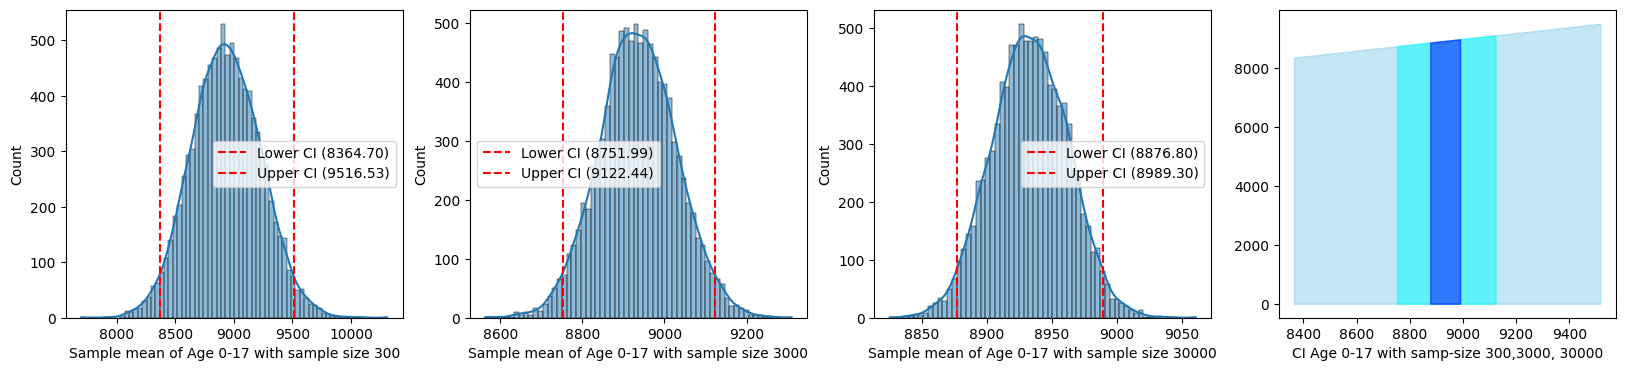

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(20, 4))

#histogram for bootstrapped age category 0 - 17 means with sample size 300, alongside with the CI
sns.histplot(bootstrapped_Age_0_17_means_sample_300, kde=True, ax=ax[0])
ax[0].axvline(x=x1_Age_0_17_300, color='r', linestyle='--', label=f'Lower CI ({x1_Age_0_17_300:.2f})')
ax[0].axvline(x=x2_Age_0_17_300, color='r', linestyle='--', label=f'Upper CI ({x2_Age_0_17_300:.2f})')
ax[0].set_xlabel('Sample mean of Age 0-17 with sample size 300')
ax[0].legend()

#histogram for bootstrapped age category 0 - 17 means with sample size 3000, alongside with the CI
sns.histplot(bootstrapped_Age_0_17_means_sample_3000, kde=True, ax=ax[1])
ax[1].axvline(x=x1_Age_0_17_3000, color='r', linestyle='--', label=f'Lower CI ({x1_Age_0_17_3000:.2f})')
ax[1].axvline(x=x2_Age_0_17_3000, color='r', linestyle='--', label=f'Upper CI ({x2_Age_0_17_3000:.2f})')
ax[1].set_xlabel('Sample mean of Age 0-17 with sample size 3000')
ax[1].legend()

#histogram for bootstrapped age category 0 - 17 means with sample size 30,000, alongside with the CI
sns.histplot(bootstrapped_Age_0_17_means_sample_30000, kde=True, ax=ax[2])
ax[2].axvline(x=x1_Age_0_17_30000, color='r', linestyle='--', label=f'Lower CI ({x1_Age_0_17_30000:.2f})')
ax[2].axvline(x=x2_Age_0_17_30000, color='r', linestyle='--', label=f'Upper CI ({x2_Age_0_17_30000:.2f})')
ax[2].set_xlabel('Sample mean of Age 0-17 with sample size 30000')
ax[2].legend()

#Created various values between CI range from lower CI to Upper CI for sample size 300, 3000, 30000 for customers with Age 0-17
samples_A_0_17_discrete_300 = np.arange(x1_Age_0_17_300, x2_Age_0_17_300, 0.1)
samples_A_0_17_discrete_3000 = np.arange(x1_Age_0_17_3000, x2_Age_0_17_3000, 0.1)
samples_A_0_17_discrete_30000 = np.arange(x1_Age_0_17_30000, x2_Age_0_17_30000, 0.1)
ax[3].fill_between(samples_A_0_17_discrete_300, samples_A_0_17_discrete_300, color='skyblue', alpha=0.5)
ax[3].fill_between(samples_A_0_17_discrete_3000, samples_A_0_17_discrete_3000, color='cyan', alpha=0.5)
ax[3].fill_between(samples_A_0_17_discrete_30000, samples_A_0_17_discrete_30000, color='blue', alpha=0.5)
ax[3].set_xlabel('CI Age 0-17 with samp-size 300,3000, 30000')
plt.show()

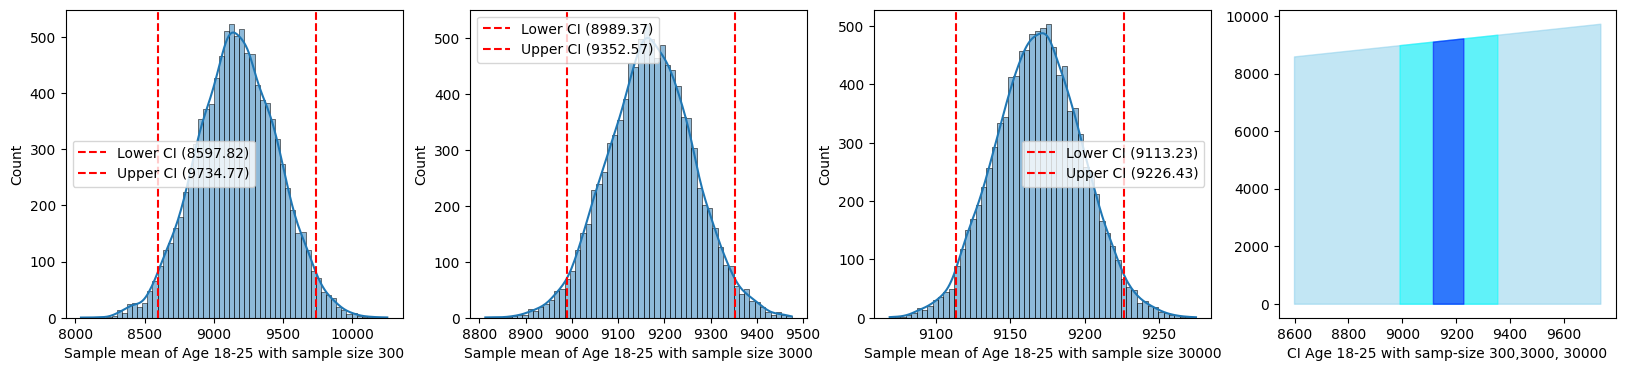

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(20, 4))

#histogram for bootstrapped age category 18 - 25 means with sample size 300, alongside with the CI
sns.histplot(bootstrapped_Age_18_25_means_sample_300, kde=True, ax=ax[0])
ax[0].axvline(x=x1_Age_18_25_300, color='r', linestyle='--', label=f'Lower CI ({x1_Age_18_25_300:.2f})')
ax[0].axvline(x=x2_Age_18_25_300, color='r', linestyle='--', label=f'Upper CI ({x2_Age_18_25_300:.2f})')
ax[0].set_xlabel('Sample mean of Age 18-25 with sample size 300')
ax[0].legend()

#histogram for bootstrapped age category 18 - 25 means with sample size 3000, alongside with the CI
sns.histplot(bootstrapped_Age_18_25_means_sample_3000, kde=True, ax=ax[1])
ax[1].axvline(x=x1_Age_18_25_3000, color='r', linestyle='--', label=f'Lower CI ({x1_Age_18_25_3000:.2f})')
ax[1].axvline(x=x2_Age_18_25_3000, color='r', linestyle='--', label=f'Upper CI ({x2_Age_18_25_3000:.2f})')
ax[1].set_xlabel('Sample mean of Age 18-25 with sample size 3000')
ax[1].legend()

#histogram for bootstrapped age category 18 - 25 means with sample size 30,000, alongside with the CI
sns.histplot(bootstrapped_Age_18_25_means_sample_30000, kde=True, ax=ax[2])
ax[2].axvline(x=x1_Age_18_25_30000, color='r', linestyle='--', label=f'Lower CI ({x1_Age_18_25_30000:.2f})')
ax[2].axvline(x=x2_Age_18_25_30000, color='r', linestyle='--', label=f'Upper CI ({x2_Age_18_25_30000:.2f})')
ax[2].set_xlabel('Sample mean of Age 18-25 with sample size 30000')
ax[2].legend()

#Created various values between CI range from lower CI to Upper CI for sample size 300, 3000, 30000 for customers with Age 18-25
samples_A_18_25_discrete_300 = np.arange(x1_Age_18_25_300, x2_Age_18_25_300, 0.1)
samples_A_18_25_discrete_3000 = np.arange(x1_Age_18_25_3000, x2_Age_18_25_3000, 0.1)
samples_A_18_25_discrete_30000 = np.arange(x1_Age_18_25_30000, x2_Age_18_25_30000, 0.1)
ax[3].fill_between(samples_A_18_25_discrete_300, samples_A_18_25_discrete_300, color='skyblue', alpha=0.5)
ax[3].fill_between(samples_A_18_25_discrete_3000, samples_A_18_25_discrete_3000, color='cyan', alpha=0.5)
ax[3].fill_between(samples_A_18_25_discrete_30000, samples_A_18_25_discrete_30000, color='blue', alpha=0.5)
ax[3].set_xlabel('CI Age 18-25 with samp-size 300,3000, 30000')
plt.show()

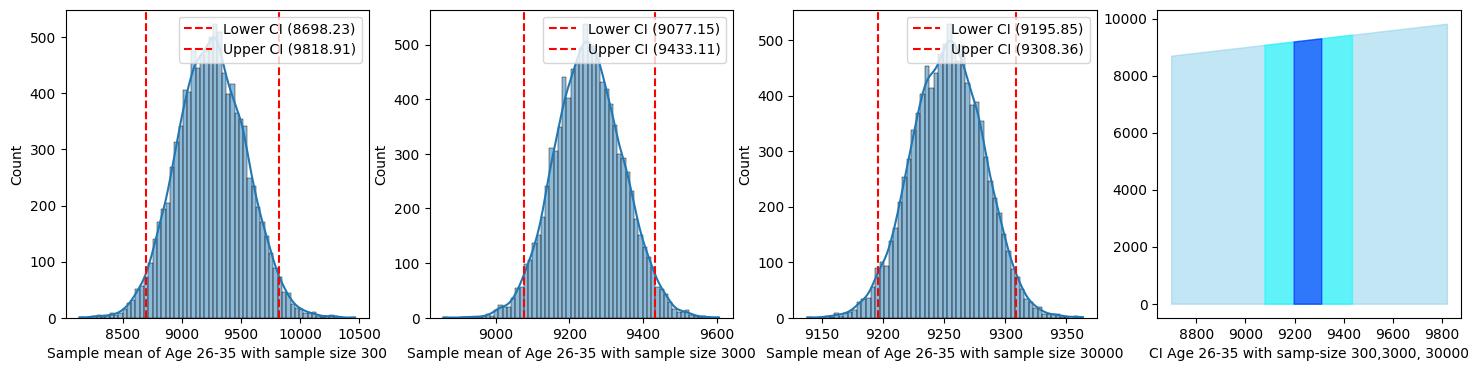

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(18, 4))

#histogram for bootstrapped age category 26 - 35 means with sample size 300, alongside with the CI
sns.histplot(bootstrapped_Age_26_35_means_sample_300, kde=True, ax=ax[0])
ax[0].axvline(x=x1_Age_26_35_300, color='r', linestyle='--', label=f'Lower CI ({x1_Age_26_35_300:.2f})')
ax[0].axvline(x=x2_Age_26_35_300, color='r', linestyle='--', label=f'Upper CI ({x2_Age_26_35_300:.2f})')
ax[0].set_xlabel('Sample mean of Age 26-35 with sample size 300')
ax[0].legend()

#histogram for bootstrapped age category 26 - 35 means with sample size 3000, alongside with the CI
sns.histplot(bootstrapped_Age_26_35_means_sample_3000, kde=True, ax=ax[1])
ax[1].axvline(x=x1_Age_26_35_3000, color='r', linestyle='--', label=f'Lower CI ({x1_Age_26_35_3000:.2f})')
ax[1].axvline(x=x2_Age_26_35_3000, color='r', linestyle='--', label=f'Upper CI ({x2_Age_26_35_3000:.2f})')
ax[1].set_xlabel('Sample mean of Age 26-35 with sample size 3000')
ax[1].legend()

#histogram for bootstrapped age category 26 - 35 means with sample size 30,000, alongside with the CI
sns.histplot(bootstrapped_Age_26_35_means_sample_30000, kde=True, ax=ax[2])
ax[2].axvline(x=x1_Age_26_35_30000, color='r', linestyle='--', label=f'Lower CI ({x1_Age_26_35_30000:.2f})')
ax[2].axvline(x=x2_Age_26_35_30000, color='r', linestyle='--', label=f'Upper CI ({x2_Age_26_35_30000:.2f})')
ax[2].set_xlabel('Sample mean of Age 26-35 with sample size 30000')
ax[2].legend()

#Created various values between CI range from lower CI to Upper CI for sample size 300, 3000, 30000 for customers with Age 26 - 35
samples_A_26_35_discrete_300 = np.arange(x1_Age_26_35_300, x2_Age_26_35_300, 0.1)
samples_A_26_35_discrete_3000 = np.arange(x1_Age_26_35_3000, x2_Age_26_35_3000, 0.1)
samples_A_26_35_discrete_30000 = np.arange(x1_Age_26_35_30000, x2_Age_26_35_30000, 0.1)
ax[3].fill_between(samples_A_26_35_discrete_300, samples_A_26_35_discrete_300, color='skyblue', alpha=0.5)
ax[3].fill_between(samples_A_26_35_discrete_3000, samples_A_26_35_discrete_3000, color='cyan', alpha=0.5)
ax[3].fill_between(samples_A_26_35_discrete_30000, samples_A_26_35_discrete_30000, color='blue', alpha=0.5)
ax[3].set_xlabel('CI Age 26-35 with samp-size 300,3000, 30000')
plt.show()

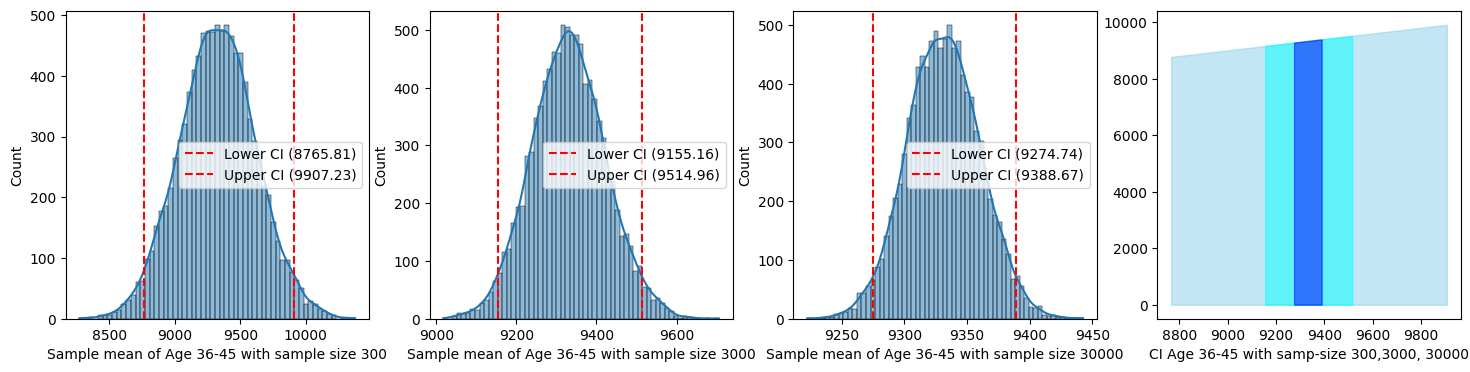

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(18, 4))

#histogram for bootstrapped age category 36 - 45 means with sample size 300, alongside with the CI
sns.histplot(bootstrapped_Age_36_45_means_sample_300, kde=True, ax=ax[0])
ax[0].axvline(x=x1_Age_36_45_300, color='r', linestyle='--', label=f'Lower CI ({x1_Age_36_45_300:.2f})')
ax[0].axvline(x=x2_Age_36_45_300, color='r', linestyle='--', label=f'Upper CI ({x2_Age_36_45_300:.2f})')
ax[0].set_xlabel('Sample mean of Age 36-45 with sample size 300')
ax[0].legend()

#histogram for bootstrapped age category 36 - 45 means with sample size 3000, alongside with the CI
sns.histplot(bootstrapped_Age_36_45_means_sample_3000, kde=True, ax=ax[1])
ax[1].axvline(x=x1_Age_36_45_3000, color='r', linestyle='--', label=f'Lower CI ({x1_Age_36_45_3000:.2f})')
ax[1].axvline(x=x2_Age_36_45_3000, color='r', linestyle='--', label=f'Upper CI ({x2_Age_36_45_3000:.2f})')
ax[1].set_xlabel('Sample mean of Age 36-45 with sample size 3000')
ax[1].legend()

#histogram for bootstrapped age category 36 - 45 means with sample size 3000, alongside with the CI
sns.histplot(bootstrapped_Age_36_45_means_sample_30000, kde=True, ax=ax[2])
ax[2].axvline(x=x1_Age_36_45_30000, color='r', linestyle='--', label=f'Lower CI ({x1_Age_36_45_30000:.2f})')
ax[2].axvline(x=x2_Age_36_45_30000, color='r', linestyle='--', label=f'Upper CI ({x2_Age_36_45_30000:.2f})')
ax[2].set_xlabel('Sample mean of Age 36-45 with sample size 30000')
ax[2].legend()

#Created various values between CI range from lower CI to Upper CI for sample size 300, 3000, 30000 for customers with Age 36 - 45
samples_A_36_45_discrete_300 = np.arange(x1_Age_36_45_300, x2_Age_36_45_300, 0.1)
samples_A_36_45_discrete_3000 = np.arange(x1_Age_36_45_3000, x2_Age_36_45_3000, 0.1)
samples_A_36_45_discrete_30000 = np.arange(x1_Age_36_45_30000, x2_Age_36_45_30000, 0.1)
ax[3].fill_between(samples_A_36_45_discrete_300, samples_A_36_45_discrete_300, color='skyblue', alpha=0.5)
ax[3].fill_between(samples_A_36_45_discrete_3000, samples_A_36_45_discrete_3000, color='cyan', alpha=0.5)
ax[3].fill_between(samples_A_36_45_discrete_30000, samples_A_36_45_discrete_30000, color='blue', alpha=0.5)
ax[3].set_xlabel('CI Age 36-45 with samp-size 300,3000, 30000')
plt.show()

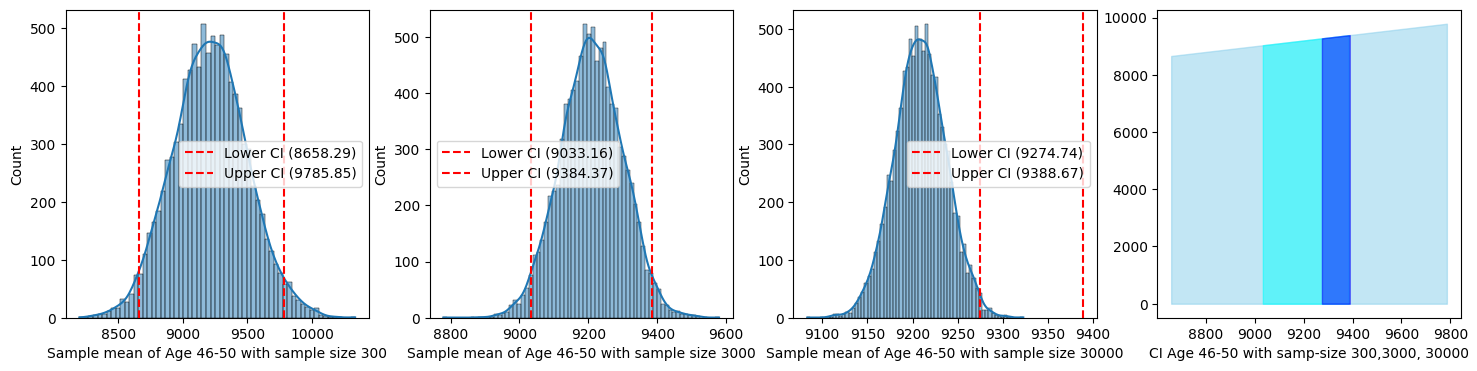

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(18, 4))

#histogram for bootstrapped age category 46 - 50 means with sample size 300, alongside with the CI
sns.histplot(bootstrapped_Age_46_50_means_sample_300, kde=True, ax=ax[0])
ax[0].axvline(x=x1_Age_46_50_300, color='r', linestyle='--', label=f'Lower CI ({x1_Age_46_50_300:.2f})')
ax[0].axvline(x=x2_Age_46_50_300, color='r', linestyle='--', label=f'Upper CI ({x2_Age_46_50_300:.2f})')
ax[0].set_xlabel('Sample mean of Age 46-50 with sample size 300')
ax[0].legend()

#histogram for bootstrapped age category 46 - 50 means with sample size 3000, alongside with the CI
sns.histplot(bootstrapped_Age_46_50_means_sample_3000, kde=True, ax=ax[1])
ax[1].axvline(x=x1_Age_46_50_3000, color='r', linestyle='--', label=f'Lower CI ({x1_Age_46_50_3000:.2f})')
ax[1].axvline(x=x2_Age_46_50_3000, color='r', linestyle='--', label=f'Upper CI ({x2_Age_46_50_3000:.2f})')
ax[1].set_xlabel('Sample mean of Age 46-50 with sample size 3000')
ax[1].legend()

#histogram for bootstrapped age category 46 - 50 means with sample size 30000, alongside with the CI
sns.histplot(bootstrapped_Age_46_50_means_sample_30000, kde=True, ax=ax[2])
ax[2].axvline(x=x1_Age_46_50_30000, color='r', linestyle='--', label=f'Lower CI ({x1_Age_46_50_30000:.2f})')
ax[2].axvline(x=x2_Age_46_50_30000, color='r', linestyle='--', label=f'Upper CI ({x2_Age_46_50_30000:.2f})')
ax[2].set_xlabel('Sample mean of Age 46-50 with sample size 30000')
ax[2].legend()

#Created various values between CI range from lower CI to Upper CI for sample size 300, 3000, 30000 for customers with Age 46 - 50
samples_A_46_50_discrete_300 = np.arange(x1_Age_46_50_300, x2_Age_46_50_300, 0.1)
samples_A_46_50_discrete_3000 = np.arange(x1_Age_46_50_3000, x2_Age_46_50_3000, 0.1)
samples_A_46_50_discrete_30000 = np.arange(x1_Age_46_50_30000, x2_Age_46_50_30000, 0.1)
ax[3].fill_between(samples_A_46_50_discrete_300, samples_A_46_50_discrete_300, color='skyblue', alpha=0.5)
ax[3].fill_between(samples_A_46_50_discrete_3000, samples_A_46_50_discrete_3000, color='cyan', alpha=0.5)
ax[3].fill_between(samples_A_46_50_discrete_30000, samples_A_46_50_discrete_30000, color='blue', alpha=0.5)
ax[3].set_xlabel('CI Age 46-50 with samp-size 300,3000, 30000')

plt.show()

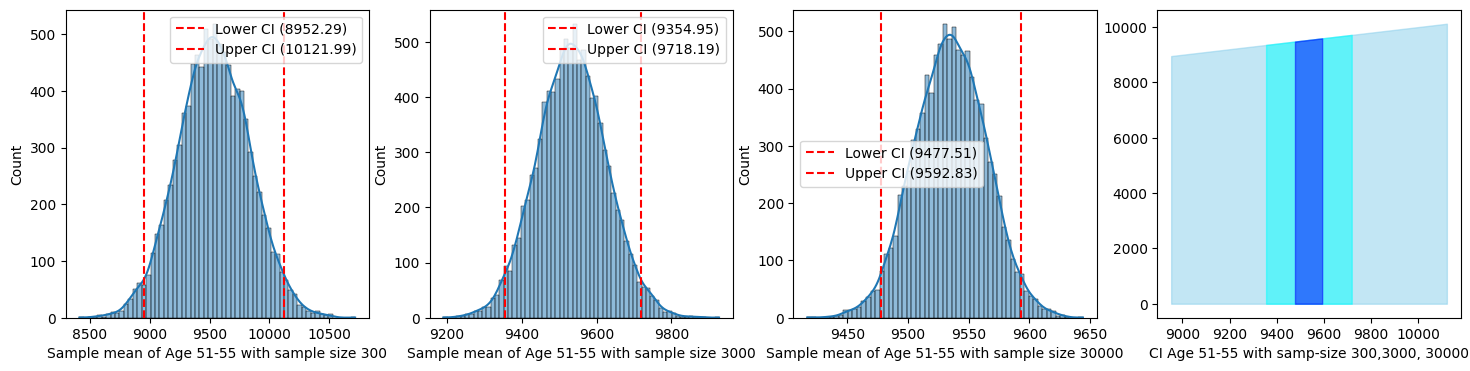

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(18, 4))

#histogram for bootstrapped age category 51 - 55 means with sample size 30000, alongside with the CI
sns.histplot(bootstrapped_Age_51_55_means_sample_300, kde=True, ax=ax[0])
ax[0].axvline(x=x1_Age_51_55_300, color='r', linestyle='--', label=f'Lower CI ({x1_Age_51_55_300:.2f})')
ax[0].axvline(x=x2_Age_51_55_300, color='r', linestyle='--', label=f'Upper CI ({x2_Age_51_55_300:.2f})')
ax[0].set_xlabel('Sample mean of Age 51-55 with sample size 300')
ax[0].legend()

#histogram for bootstrapped age category 51 - 55 means with sample size 3000, alongside with the CI
sns.histplot(bootstrapped_Age_51_55_means_sample_3000, kde=True, ax=ax[1])
ax[1].axvline(x=x1_Age_51_55_3000, color='r', linestyle='--', label=f'Lower CI ({x1_Age_51_55_3000:.2f})')
ax[1].axvline(x=x2_Age_51_55_3000, color='r', linestyle='--', label=f'Upper CI ({x2_Age_51_55_3000:.2f})')
ax[1].set_xlabel('Sample mean of Age 51-55 with sample size 3000')
ax[1].legend()

#histogram for bootstrapped age category 51 - 55 means with sample size 30000, alongside with the CI
sns.histplot(bootstrapped_Age_51_55_means_sample_30000, kde=True, ax=ax[2])
ax[2].axvline(x=x1_Age_51_55_30000, color='r', linestyle='--', label=f'Lower CI ({x1_Age_51_55_30000:.2f})')
ax[2].axvline(x=x2_Age_51_55_30000, color='r', linestyle='--', label=f'Upper CI ({x2_Age_51_55_30000:.2f})')
ax[2].set_xlabel('Sample mean of Age 51-55 with sample size 30000')
ax[2].legend()

#Created various values between CI range from lower CI to Upper CI for sample size 300, 3000, 30000 for customers with Age 51 - 55
samples_A_51_55_discrete_300 = np.arange(x1_Age_51_55_300, x2_Age_51_55_300, 0.1)
samples_A_51_55_discrete_3000 = np.arange(x1_Age_51_55_3000, x2_Age_51_55_3000, 0.1)
samples_A_51_55_discrete_30000 = np.arange(x1_Age_51_55_30000, x2_Age_51_55_30000, 0.1)
ax[3].fill_between(samples_A_51_55_discrete_300, samples_A_51_55_discrete_300, color='skyblue', alpha=0.5)
ax[3].fill_between(samples_A_51_55_discrete_3000, samples_A_51_55_discrete_3000, color='cyan', alpha=0.5)
ax[3].fill_between(samples_A_51_55_discrete_30000, samples_A_51_55_discrete_30000, color='blue', alpha=0.5)
ax[3].set_xlabel('CI Age 51-55 with samp-size 300,3000, 30000')
plt.show()

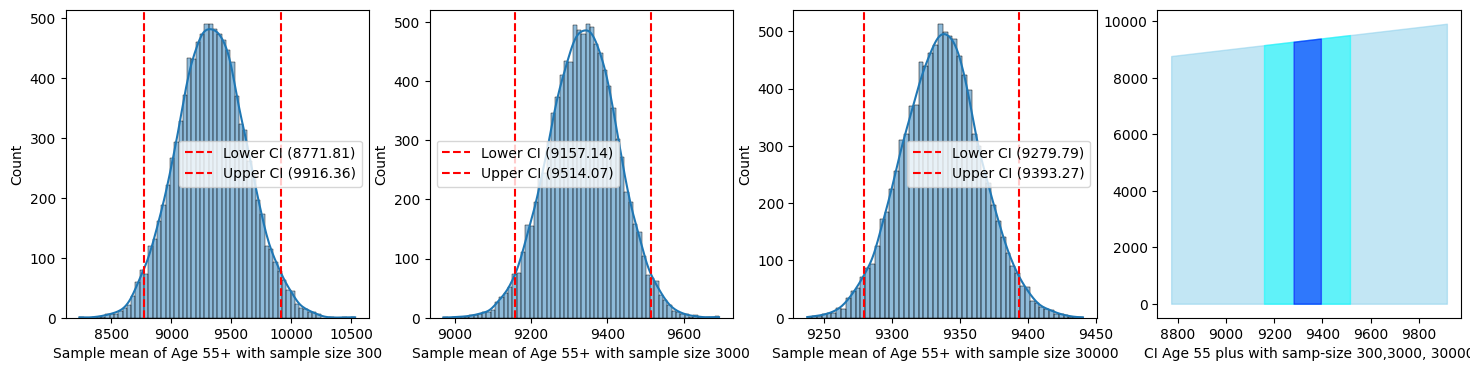

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(18, 4))

#histogram for bootstrapped age category 55 plus means with sample size 300, alongside with the CI
sns.histplot(bootstrapped_Age_55_plus_means_sample_300, kde=True, ax=ax[0])
ax[0].axvline(x=x1_Age_55_plus_300, color='r', linestyle='--', label=f'Lower CI ({x1_Age_55_plus_300:.2f})')
ax[0].axvline(x=x2_Age_55_plus_300, color='r', linestyle='--', label=f'Upper CI ({x2_Age_55_plus_300:.2f})')
ax[0].set_xlabel('Sample mean of Age 55+ with sample size 300')
ax[0].legend()

#histogram for bootstrapped age category 55 plus means with sample size 3000, alongside with the CI
sns.histplot(bootstrapped_Age_55_plus_means_sample_3000, kde=True, ax=ax[1])
ax[1].axvline(x=x1_Age_55_plus_3000, color='r', linestyle='--', label=f'Lower CI ({x1_Age_55_plus_3000:.2f})')
ax[1].axvline(x=x2_Age_55_plus_3000, color='r', linestyle='--', label=f'Upper CI ({x2_Age_55_plus_3000:.2f})')
ax[1].set_xlabel('Sample mean of Age 55+ with sample size 3000')
ax[1].legend()

#histogram for bootstrapped age category 55 plus means with sample size 30000, alongside with the CI
sns.histplot(bootstrapped_Age_55_plus_means_sample_30000, kde=True, ax=ax[2])
ax[2].axvline(x=x1_Age_55_plus_30000, color='r', linestyle='--', label=f'Lower CI ({x1_Age_55_plus_30000:.2f})')
ax[2].axvline(x=x2_Age_55_plus_30000, color='r', linestyle='--', label=f'Upper CI ({x2_Age_55_plus_30000:.2f})')
ax[2].set_xlabel('Sample mean of Age 55+ with sample size 30000')
ax[2].legend()

#Created various values between CI range from lower CI to Upper CI for sample size 300, 3000, 30000 for customers with Age 55 plus
samples_A_55_plus_discrete_300 = np.arange(x1_Age_55_plus_300, x2_Age_55_plus_300, 0.1)
samples_A_55_plus_discrete_3000 = np.arange(x1_Age_55_plus_3000, x2_Age_55_plus_3000, 0.1)
samples_A_55_plus_discrete_30000 = np.arange(x1_Age_55_plus_30000, x2_Age_55_plus_30000, 0.1)
ax[3].fill_between(samples_A_55_plus_discrete_300, samples_A_55_plus_discrete_300, color='skyblue', alpha=0.5)
ax[3].fill_between(samples_A_55_plus_discrete_3000, samples_A_55_plus_discrete_3000, color='cyan', alpha=0.5)
ax[3].fill_between(samples_A_55_plus_discrete_30000, samples_A_55_plus_discrete_30000, color='blue', alpha=0.5)
ax[3].set_xlabel('CI Age 55 plus with samp-size 300,3000, 30000')

plt.show()

<B>Q: How is the width of the confidence interval affected by the sample size?</B>

A: As the sample size increases the CI range decreases. For example, <B>CI of sample mean of Age 55+ sample size 30,000 < CI of sample mean of Age 55+ sample size 3000 < CI of sample mean of Age 55+ sample size 300.</B> This is directly visible in the above picture.

<B>Q: How does the sample size affect the shape of the distributions of the
means?</B>

A: The bell shaped curve becomes smoother and smoother as the sample size increases. For example, the smoothness of the curve is higher for sample mean of Age 55+ sample size 30,000 followed by sample mean of Age 55+ sample size 3000 with slightly less smooth curve followed by sample mean of Age 55+ sample size 300 little more less smooth curve. This same trend is also seen in other age groups as well.

<B>Q: Do the confidence intervals for different sample sizes overlap?</B>

A: The CI with sample sizes 300 is overlapped with the CI of sample sizes 3000 and then it is again overlapped with CI of sample sizes 30000. The above picture on the right side affirms the same. In this picture, skyblue color indicates that the area formed by CI with sample size 300, followed by cyan color indicates that the area formed by CI with sample size 3000 and this is again followed by blue color indicates that the area formed by CI with sample size 300. The area where the graphs overlap indicates the range of values that are common to all 3 distributions, showing that they are overlapping each other. The same trend can also be observed with customers with other age categories.

<H1><font color='orange'>Recommendations</font></H1>

> Product category 1, 5 and 8 are commonly used by all customers irrespective of their location, stay, marital status or occupation. However, rest of the products does not have a huge impact on the customers. The walmart can offer some discounts to other products, and as a result the walmart can improve the sales of other products.

> Most of the walmart customers belongs to the age group 26 - 35, and these customers intend's to buy product categories 1, 5 and 8. To target this age group we can provide some seasonal discounts such that we can maximise the profits from these age groups. Other age groups may or may not find products suitable for them from walmart. A general solution to this is a good advertisements on all product categories available in walmart that can improve the sales of all products. Furthermore, try to incorporate more products that is in favour of all age categories can also improve the sales.

> Compared to male customers, female customers are extremely low in buying walmart products. The CI of females does not overlap with the CI of males. This could be of two reasons, 1 : products may be highly expensive or 2 : the walmart does not have products in favour of females. To tackle this, provide a price reduction for female candidates also try to include products in favour females.

> Compared to unmarried customers, married customers are low in buying walmart products, even though, the CI of married customers does overlaps with the CI of unmarried customers. One possible reason could be, products may be highly expensive. To tackle this, Buy Now Pay Later (BNPL) scheme could be an ideal option for married customers. This would slightly improve the profit from married customers.

